In [29]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import datetime
plt.rc('font', size=30)
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=30)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=30)
plt.rc('lines', linewidth=3)

In [5]:
MaxPhonon = 10
def EITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(3,1)*basis(3,0).dag(),(1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())- OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())+Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon))]
    rho_ss = steadystate(H, c_ops, method='svd')
    return rho_ss

def DoubleEITSimulationWithIonMotion_test(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())- OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())+Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon))]
    e_ops = [tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output


def EITNoMotion(Omega_p, Omega_c, Delta0, Delta1, Delta2, gammaSP, tlist = np.linspace(0,10,100)):
     #Hamiltonian
    Hhalf = Omega_p*basis(3,1)*basis(3,0).dag() + Omega_c*basis(3,2)*basis(3,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(3,0)*basis(3,0).dag() + Delta1*basis(3,1)*basis(3,1).dag() + Delta2*basis(3,2)*basis(3,2).dag() 
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(3,1)*basis(3,0).dag(), np.sqrt(gammaSP)*basis(3,1)*basis(3,2).dag()]
    rho_ss = steadystate(H, c_ops, method='svd')
    
    s_init = basis(3,1)
    e_ops = [basis(3,0)*basis(3,0).dag(), basis(3,1)*basis(3,1).dag()]
    state = mesolve(H, s_init, tlist, c_ops = c_ops, e_ops = e_ops)
    return rho_ss
    #return state

def DoubleEITNoMotion_test(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    e_ops = [basis(4,0)*basis(4,0).dag()]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output


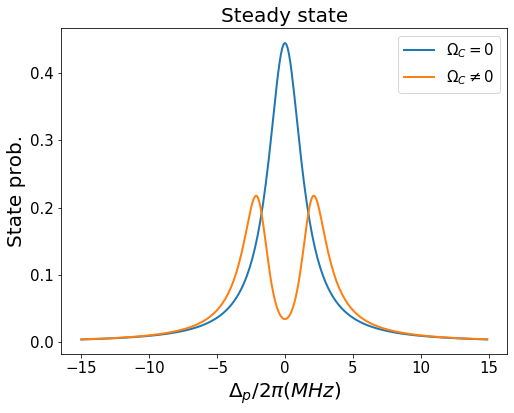

In [35]:
gammaSP = 1 #Linewith
Omega_p = 1 # Rabi frequency
Omega_cs = [0, 2]
Delta0 = 0
Delta1 = 0
Delta2 = 0

label = [r'$\Omega_C = 0$', r'$\Omega_C \neq 0$']
cnt = 0
plt.figure(figsize = (8,6))
for Omega_c in Omega_cs:
    DeltaList = np.arange(-15,15,0.1)
    ExcitedStatePopulation = [expect(basis(3,0)*basis(3,0).dag(),EITNoMotion(Omega_p, Omega_c, Delta0, Delta, Delta2, gammaSP)) for Delta in DeltaList]

    plt.plot(DeltaList, ExcitedStatePopulation, label=label[cnt])
    cnt+=1
    
plt.legend()
plt.xlabel('$\Delta_p/2\pi (MHz)$')
plt.ylabel('State prob.')
plt.title('Steady state');

# tlist = np.linspace(0,10,100)
# states = EITNoMotion(Omega_p, Omega_c, Delta0, Delta1, Delta2, gammaSP, tlist)
# plt.plot(tlist, states.expect[0])
# plt.plot(tlist, states.expect[1])
plt.savefig('Fig2_EIT1.png', dpi=300, bbox_inches='tight')

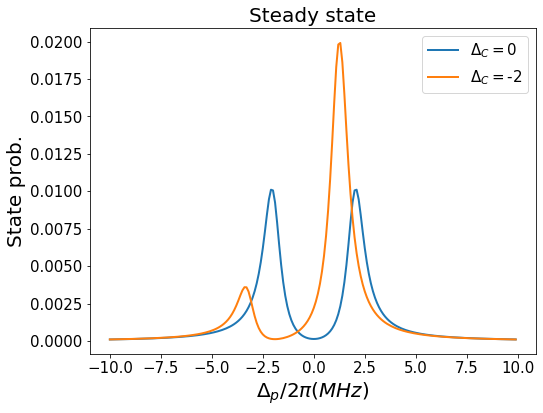

In [37]:
gammaSP = 1 #Linewith
Omega_p = 0.1 # Rabi frequency
Omega_cs = 2
Delta0 = 0
Delta1 = 0
Delta2s = [0,-2]

cnt = 0
plt.figure(figsize = (8,6))
for Delta2 in Delta2s:
    DeltaList = np.arange(-10,10,0.1)
    ExcitedStatePopulation = [expect(basis(3,0)*basis(3,0).dag(),EITNoMotion(Omega_p, Omega_c, Delta0, Delta, Delta2, gammaSP)) for Delta in DeltaList]

    label = r'$\Delta_C = $'+str(Delta2)
    plt.plot(DeltaList, ExcitedStatePopulation, label=label)
    cnt+=1
    
plt.legend()
plt.xlabel('$\Delta_p/2\pi (MHz)$')
plt.ylabel('State prob.')
plt.title('Steady state');

# tlist = np.linspace(0,10,100)
# states = EITNoMotion(Omega_p, Omega_c, Delta0, Delta1, Delta2, gammaSP, tlist)
# plt.plot(tlist, states.expect[0])
# plt.plot(tlist, states.expect[1])
plt.savefig('Fig2_EIT2.png', dpi=300, bbox_inches='tight')

The Hamiltonian having a motional determined term

\begin{equation}
\hat{H}/\hbar=\begin{pmatrix}
\omega_{\left| e \right>}&\frac{\Omega_{\sigma-}}{2}e^{i(\vec{k}_{\rm d}\cdot\vec{r}-\omega_{\rm d}t)}&-\frac{\Omega_\pi}{2}e^{i(\vec{k}_{\rm p}\cdot\vec{r}-\omega_{\rm p}t)}&\frac{\Omega_{\sigma+}}{2}e^{i(\vec{k}_{\rm d}\cdot\vec{r}-\omega_{\rm d}t)}\\
\frac{\Omega_{\sigma-}}{2}e^{-i(\vec{k}_{\rm d}\cdot\vec{r}-\omega_{\rm d}t)}&\omega_{\left| + \right>}&0&0\\
-\frac{\Omega_\pi}{2}e^{-i(\vec{k}_{\rm p}\cdot\vec{r}-\omega_{\rm p}t)}&0&\omega_{\left| 0 \right>}&0\\
\frac{\Omega_{\sigma+}}{2}e^{-i(\vec{k}_{\rm d}\cdot\vec{r}-\omega_{\rm d}t)}&0&0&\omega_{\left| - \right>},
\end{pmatrix}+\nu a^\dagger a, 
\end{equation}

where the basis is {$\left| e \right>$, $\left| + \right>$, $\left| 0 \right>$, $\left| - \right>$}. In the rotating frame the Hamiltonian can be simplified to 

\begin{equation}
\hat{H}_{\rm r}/\hbar=\begin{pmatrix}
0&\frac{\Omega_{\sigma-}}{2}e^{i\vec{k}_{\rm d}\cdot\vec{r}}&-\frac{\Omega_\pi}{2}e^{i\vec{k}_{\rm p}\cdot\vec{r}}&\frac{\Omega_{\sigma+}}{2}e^{i\vec{k}_{\rm d}\cdot\vec{r}}\\
\frac{\Omega_{\sigma-}}{2}e^{-i\vec{k}_{\rm d}\cdot\vec{r}}&\Delta_{\rm d}+\delta_{\rm{B}}&0&0\\
-\frac{\Omega_\pi}{2}e^{-i\vec{k}_{\rm p}\cdot\vec{r}}&0&\Delta_{\rm p}&0\\
\frac{\Omega_{\sigma+}}{2}e^{-i\vec{k}_{\rm d}\cdot\vec{r}}&0&0&\Delta_{\rm d}-\delta_{\rm{B}}
\end{pmatrix}+\nu a^\dagger a.
\end{equation}

The absorption spectrum can be obtained by numerical solving the steady state solution of the master equationcorresponding to the Hamiltonian. The cooling speed can be calculated by solving the time evolution of the master equation corresponding  to $\hat{H}_{\rm r}$ the cooling limit can be calculated by  the average phonon number of the steady statesolution of the master equation.

\begin{equation}
    \frac{d\hat\rho}{dt}=-i [\hat{H}_{\rm s},\hat \rho]+\mathcal{L}\rho,
\end{equation}

where $\mathcal{L}$ is the Lindblad operator corresponding to the three spontaneous decay channel  $\mathcal{L}\rho=\sum_{i=1}^3 c_i\rho c_i^\dagger-\frac{1}{2}[c_i^\dagger c_i,\rho]$ and $c_1=\sqrt{\Gamma/3}\left| + \right>\left< e \right|$, $c_2=\sqrt{\Gamma/3}\left| 0 \right>\left< e \right|$, $c_1=\sqrt{\Gamma/3}\left| - \right>\left< e \right|$. For the Yb ion, $\Gamma \approx 2\pi \times 20$ MHz. In our setup, $\vec{k}_{\rm d}=-\vec{k}_{\rm p}=\hat{x}=\eta(\hat{a}+\hat{a}^\dagger)=\sqrt{\frac{1}{2M\omega_{\rm CM}}}(\hat{a}+\hat{a}^\dagger)$, where $\omega_{\rm CM} = 2\pi \times 3$ MHz.

## Initial setting

In [13]:
MaxPhonon = 10
tau_m = 3000 # motional decoherence time (us)

def DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())- OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())+Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    rho_ss = steadystate(H, c_ops, method='svd')
    return rho_ss

def DoubleEITSimulationWithIonMotion_test(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())- OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())+Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    e_ops = [tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon)),
            tensor(basis(4,0)*basis(4,0).dag(), qeye(MaxPhonon)),
            tensor(basis(4,1)*basis(4,1).dag(), qeye(MaxPhonon)),
            tensor(basis(4,2)*basis(4,2).dag(), qeye(MaxPhonon)),
            tensor(basis(4,3)*basis(4,3).dag(), qeye(MaxPhonon))]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output


def DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, gammaSP, tlist = np.linspace(0,10,100)):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    rho_ss = steadystate(H, c_ops, method='svd')
    
    return rho_ss

def DoubleEITNoMotion_test(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta1, Delta2, Delta_3, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    
    #solve the steady state
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    
    e_ops = [basis(4,0)*basis(4,0).dag(), 
             basis(4,1)*basis(4,1).dag(), 
             basis(4,2)*basis(4,2).dag(), 
             basis(4,3)*basis(4,3).dag()]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output


def DoubleEITSimulationWithIonMotion_cryo_mesolve(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, nu, eta_pi, eta_sigma, delta_dp, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            - OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            +Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    H_time1 = Omega_Minus2*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) ## delta_dp should be negative
    H_time2 = Omega_Minus2*tensor(basis(4,0)*basis(4,1).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*tensor(basis(4,0)*basis(4,3).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t)
    
    #solve the final state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],[H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
            np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    e_ops = [tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon)),
            tensor(basis(4,0)*basis(4,0).dag(), qeye(MaxPhonon)),
            tensor(basis(4,1)*basis(4,1).dag(), qeye(MaxPhonon)),
            tensor(basis(4,2)*basis(4,2).dag(), qeye(MaxPhonon)),
            tensor(basis(4,3)*basis(4,3).dag(), qeye(MaxPhonon))]
    opts = Options(store_states=True)
    output = mesolve(H_full, rho0, t, c_ops, e_ops, options=opts)
    return output

# Need to add motional dephasing term to make the steady-state calculation work
def DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, 
                        Delta2, Delta_3, nu, eta_pi, eta_sigma, delta_dp, gammaSP):
    #Hamiltonian
    Hhalf = Omega_Minus*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            - OmegaPi*tensor(basis(4,2)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())\
            + Omega_Plus*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_sigma*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    H = Hhalf + Hhalf.dag() + Delta0*tensor(basis(4,0)*basis(4,0).dag(),qeye(MaxPhonon)) + Delta1*tensor(basis(4,1)*basis(4,1).dag(),qeye(MaxPhonon)) + Delta2*tensor(basis(4,2)*basis(4,2).dag(),qeye(MaxPhonon)) + Delta_3*tensor(basis(4,3)*basis(4,3).dag(),qeye(MaxPhonon)) +\
    nu*tensor(qeye(4),create(MaxPhonon)*destroy(MaxPhonon))
    H_time1 = Omega_Minus2*tensor(basis(4,1)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) ## delta_dp should be negative
    H_time2 = Omega_Minus2*tensor(basis(4,0)*basis(4,1).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*tensor(basis(4,3)*basis(4,0).dag(),(-1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*tensor(basis(4,0)*basis(4,3).dag(),(1j*eta_pi*(create(MaxPhonon)+destroy(MaxPhonon))).expm())
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t)
    
    #solve the final state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],
              [H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    
    c_ops = [np.sqrt(gammaSP)*tensor(basis(4,1)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,2)*basis(4,0).dag(),qeye(MaxPhonon)), 
             np.sqrt(gammaSP)*tensor(basis(4,3)*basis(4,0).dag(),qeye(MaxPhonon)),
             np.sqrt(2/(tau_m))*tensor(qeye(4), create(MaxPhonon)*destroy(MaxPhonon))]
    
    #rho_ss = steadystate(H_full, c_ops, method='svd')
    rho_ss = steadystate(H, c_ops, method='svd')
    return rho_ss


def DoubleEITNoMotion_cryo_mesolve(t, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, delta_dp, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    H_time1 = Omega_Minus2*basis(4,1)*basis(4,0).dag()
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time2 = Omega_Minus2*basis(4,0)*basis(4,1).dag()
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*basis(4,3)*basis(4,0).dag()
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*basis(4,0)*basis(4,3).dag()
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    #solve the steady state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],[H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]
    e_ops = [basis(4,0)*basis(4,0).dag(),
             basis(4,1)*basis(4,1).dag(),
             basis(4,2)*basis(4,2).dag(),
             basis(4,3)*basis(4,3).dag()]
    opts = Options(store_states=True)
    output = mesolve(H, rho0, t, c_ops, e_ops, options=opts)
    return output

def DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta1, Delta2, Delta_3, delta_dp, gammaSP):
     #Hamiltonian
    Hhalf = Omega_Minus*basis(4,1)*basis(4,0).dag()- OmegaPi*basis(4,2)*basis(4,0).dag()+Omega_Plus*basis(4,3)*basis(4,0).dag()
    H = Hhalf + Hhalf.dag() + Delta0*basis(4,0)*basis(4,0).dag() + Delta1*basis(4,1)*basis(4,1).dag() + Delta2*basis(4,2)*basis(4,2).dag()+ Delta_3*basis(4,3)*basis(4,3).dag() 
    H_time1 = Omega_Minus2*basis(4,1)*basis(4,0).dag()
    def H_time1_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time2 = Omega_Minus2*basis(4,0)*basis(4,1).dag()
    def H_time2_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    H_time3 = Omega_Plus2*basis(4,3)*basis(4,0).dag()
    def H_time3_coeff(t, args):
        return np.exp(-1j * delta_dp * t) 
    H_time4 = Omega_Plus2*basis(4,0)*basis(4,3).dag()
    def H_time4_coeff(t, args):
        return np.exp(1j * delta_dp * t) 
    #solve the steady state
    H_full = [H,[H_time1, H_time1_coeff],[H_time2, H_time2_coeff],[H_time3, H_time3_coeff],[H_time4, H_time4_coeff]]
    c_ops = [np.sqrt(gammaSP)*basis(4,1)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,2)*basis(4,0).dag(), 
             np.sqrt(gammaSP)*basis(4,3)*basis(4,0).dag()]

    rho_ss = steadystate(H, c_ops, method='svd')
    return rho_ss


def BestDetuning(detuningList,phononList):
    small = phononList[0]
    index = 0
    for i in np.arange(len(phononList)):
        if phononList[i]<small:
            small=phononList[i]
            index=i
    return [detuningList[index],small]

## To Understand the machanism

In [14]:
SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 32

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0, 0.5, 'State probability')

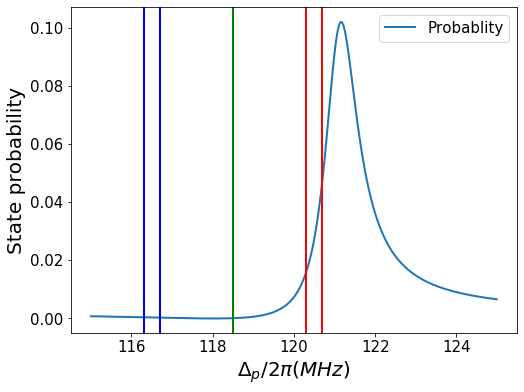

In [56]:
gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 125 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
#Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 1.9 # mode frequency
eta = 0.1

# DeltaList = np.arange(37,53,0.01)
DeltaList = np.arange(115,125,0.01)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

delta = (np.sqrt(Delta_Plus**2+OmegaPi**2+Omega_Plus**2+Omega_Minus**2/2)-Delta_Plus)/2

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")

# Delta_p = 45.9
Delta_p = 118.5
ax.axvline(x=Delta_p, color = 'g') 
# Delta_P should be Delta_d + Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta_p+1.8, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta_p+2.2, color = 'r') 
ax.axvline(x=Delta_p-1.8, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.axvline(x=Delta_p-2.2, color = 'b')

# ax.axvline(x=50.14, color='black') # Delta_P + motional mode, should be on the right peak 
# ax.axvline(x=64.47, color='black') # Delta_P + motional mode, should be on the right peak 

ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
# ax.set_title('EIT Cooling Demonstration');
# plt.savefig('EIT_demo.svg', format='svg', dpi=1200)
# plt.savefig('Fig2_EIT3.png', dpi=300, bbox_inches='tight')

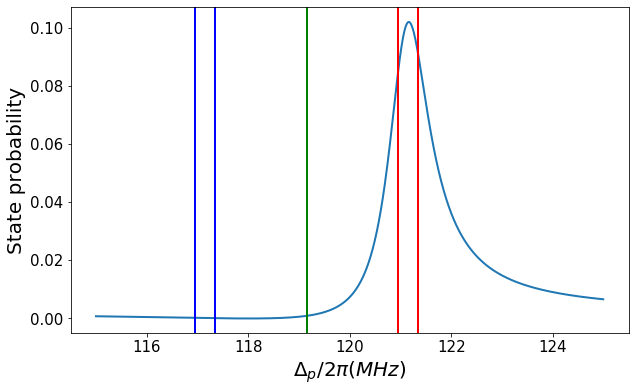

In [57]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")

Delta_p = 119.15
ax.axvline(x=Delta_p, color = 'g') 
# Delta_P should be Delta_d + Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta_p+1.8, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta_p+2.2, color = 'r') 
ax.axvline(x=Delta_p-1.8, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.axvline(x=Delta_p-2.2, color = 'b')


# ax.axvline(x=50.14, color='black') # Delta_P + motional mode, should be on the right peak 
# ax.axvline(x=64.47, color='black') # Delta_P + motional mode, should be on the right peak 

# ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
# ax.set_title('EIT Cooling Demonstration');
# plt.savefig('EIT_demo.svg', format='svg', dpi=1200)
plt.savefig('Fig2_EIT3.png', dpi=300, bbox_inches='tight')

#### Quick review: Compare the ideal polarization setup and cryo setup

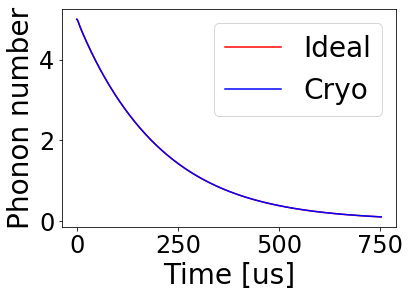

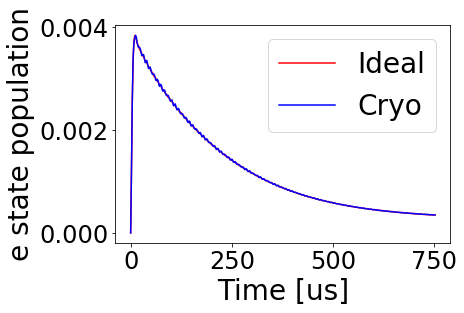

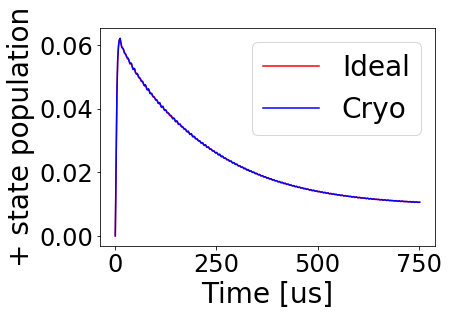

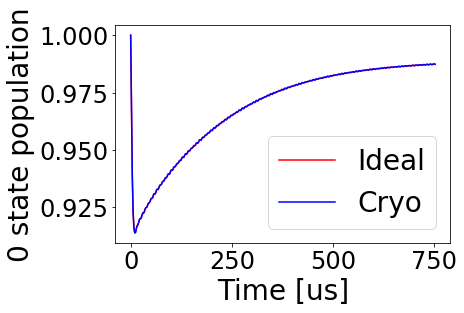

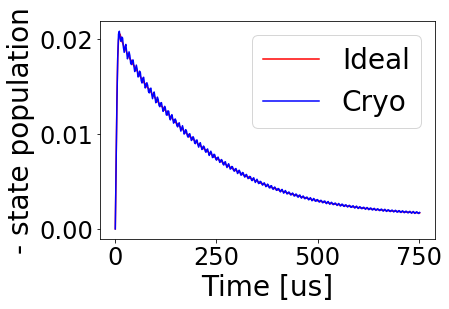

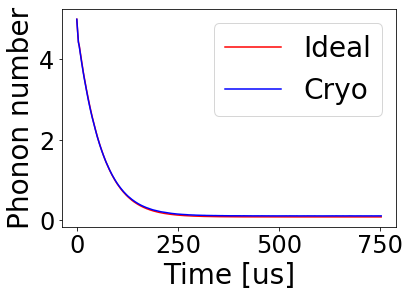

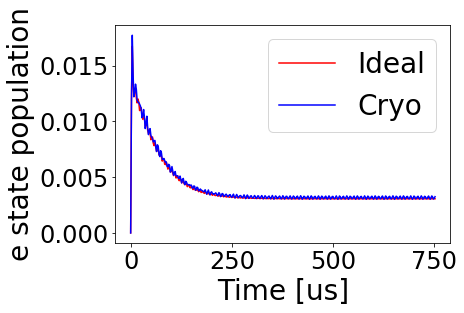

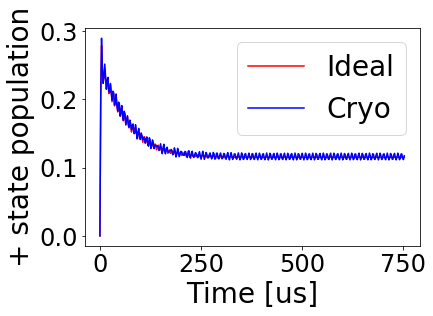

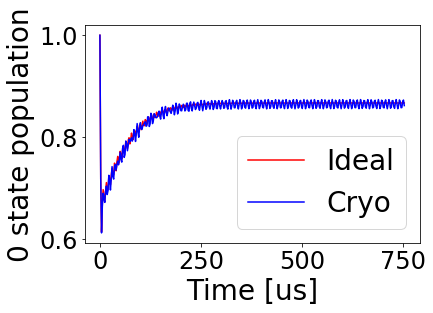

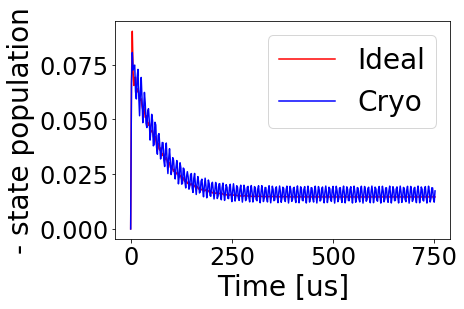

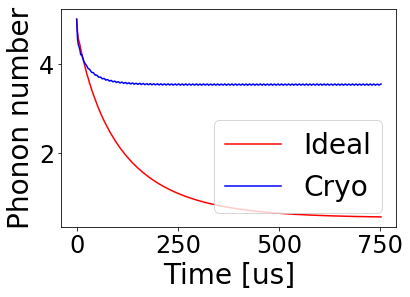

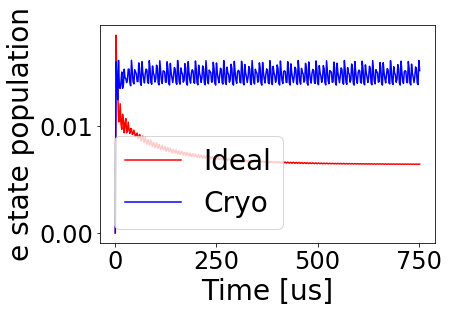

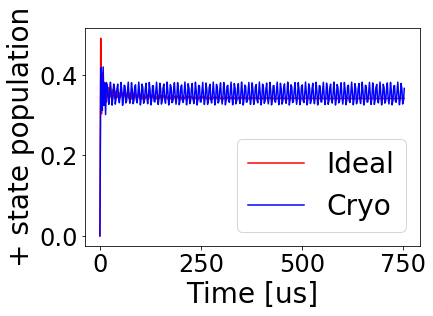

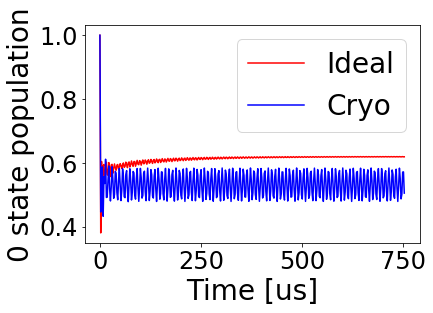

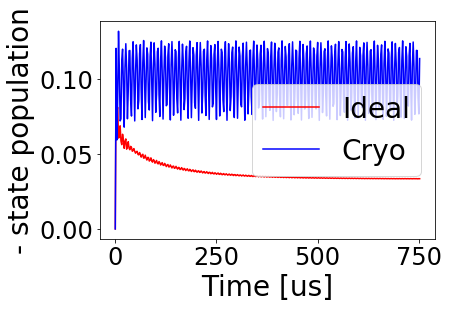

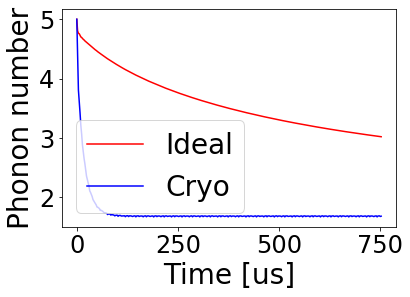

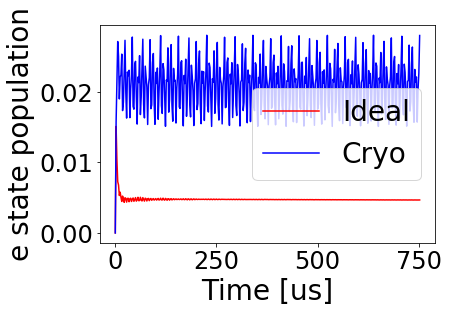

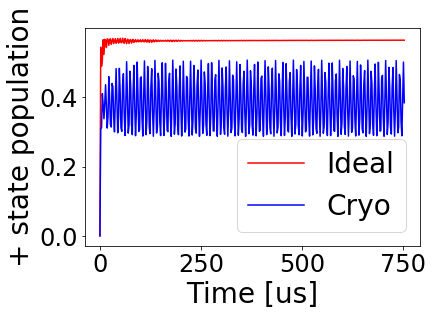

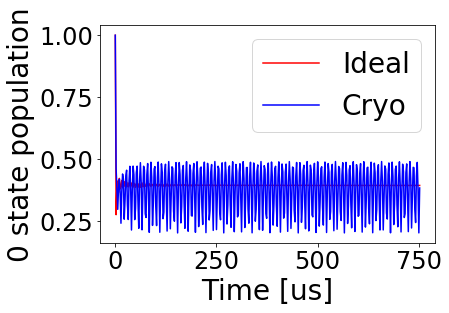

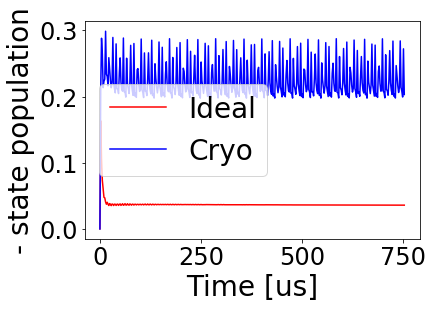

In [9]:
MaxPhonon = 6
tlist = np.arange(0,120*2*np.pi,2)
rho0 = tensor(basis(4,2),basis(MaxPhonon,MaxPhonon-1))

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23

ratios = [0.05, 0.2, 0.5, 1]
for ratio in ratios: 
    OmegaPi = Omega_Plus*ratio
    Omega_Plus2 = OmegaPi/2
    Omega_Minus2 = OmegaPi/2

    Delta = 50 # pumping beam detuning
    Zeeman = 7 # Zeeman shift
    delta_dp = -Zeeman
    Delta_Minus = Delta-Zeeman
    Delta_Plus = Delta+Zeeman
    Delta_P = -Delta
    Delta0 = 0
    nu = 2.25 # mode frequency
    eta = 0.1

    Delta = 45.5
    output1 = DoubleEITSimulationWithIonMotion_test(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP)
    output2 = DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, delta_dp, gammaSP)

    plt.plot(tlist, output1.expect[0], 'r',label = 'Ideal')
    plt.plot(tlist, output2.expect[0], 'b',label = 'Cryo')
    plt.legend()

    plt.xlabel('Time [us]')
    plt.ylabel('Phonon number')
    plt.show()

    plt.plot(tlist, output1.expect[1], 'r',label = 'Ideal')
    plt.plot(tlist, output2.expect[1], 'b',label = 'Cryo')
    plt.legend()
    plt.xlabel('Time [us]')
    plt.ylabel('e state population')
    plt.show()

    plt.plot(tlist, output1.expect[2], 'r',label = 'Ideal')
    plt.plot(tlist, output2.expect[2], 'b',label = 'Cryo')
    plt.legend()
    plt.xlabel('Time [us]')
    plt.ylabel('+ state population')
    plt.show()

    plt.plot(tlist, output1.expect[3], 'r',label = 'Ideal')
    plt.plot(tlist, output2.expect[3], 'b',label = 'Cryo')
    plt.legend()
    plt.xlabel('Time [us]')
    plt.ylabel('0 state population')
    plt.show()

    plt.plot(tlist, output1.expect[4], 'r',label = 'Ideal')
    plt.plot(tlist, output2.expect[4], 'b',label = 'Cryo')
    plt.legend()
    plt.xlabel('Time [us]')
    plt.ylabel('- state population')
    plt.show()

## Example
### Red Chamber setting

Temperature limit1： 0.033984
Temperature limit2： 0.567843
Delta =  45.63
Mode frequency =  2.2


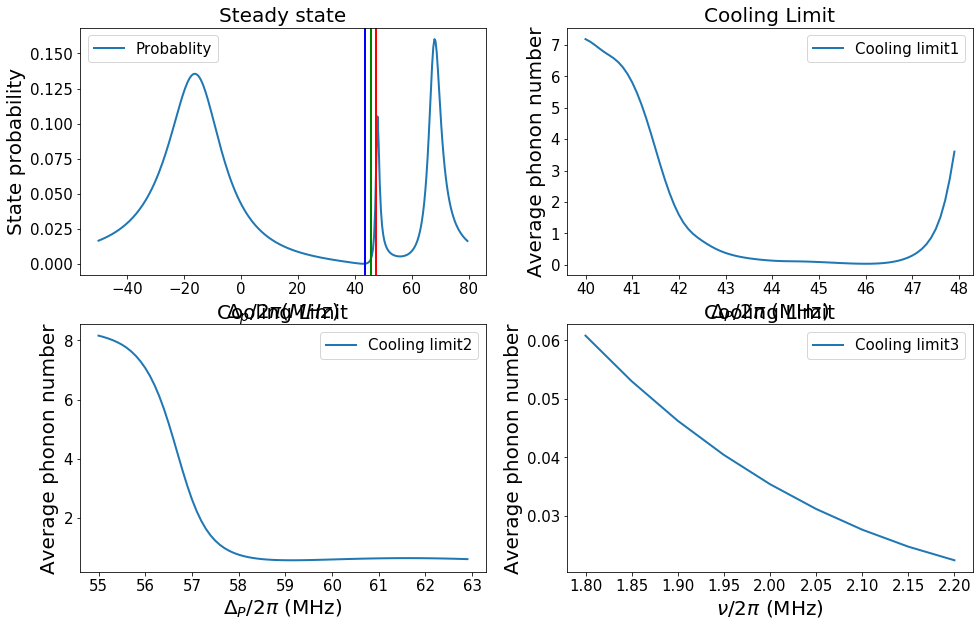

In [39]:
gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 50 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 1.9 # mode frequency
eta = 0.1

DeltaList = np.arange(-50,80,0.4)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

cooling_detuning_list1 = np.arange(40,48,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(55,63,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = 45.63
# Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=45.63, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=45.63+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=45.63-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

In [40]:
Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3_1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta1, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3_2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta2, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

In [41]:
DeltaList = np.arange(35,70,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

Text(0, 0.5, 'Average phonon number')

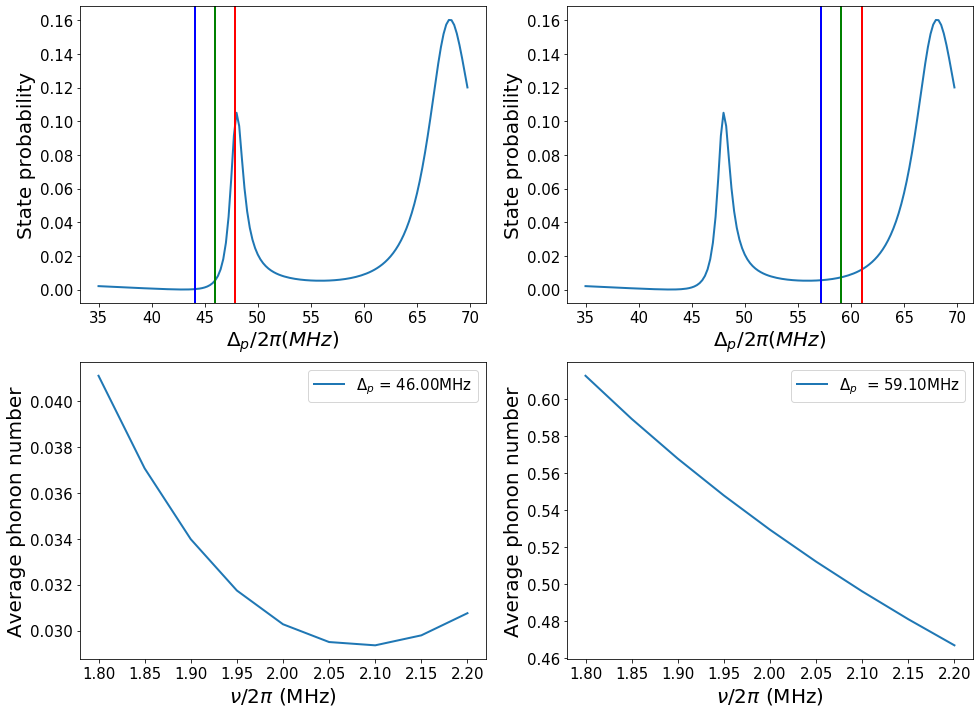

In [42]:
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.rc('figure', titlesize=20)
plt.rc('lines', linewidth=2)
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta1, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta1+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta1-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
# ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta2, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta2+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta2-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
# ax.set_title('Steady state');

ax = fig.add_subplot(2,2,3)
ax.plot(motion_frequency_list, cooling_limit_List3_1, label=r"$\Delta_p$ = "+"{:.2f}".format(Delta1)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
# ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3_2, label=r"$\Delta_p$  = "+"{:.2f}".format(Delta2)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
# ax.set_title('Cooling Limit');

# fig.savefig('EIT_125MHz.png', format='png', dpi=1200)
# plt.savefig('Fig2_EIT4.png', dpi=300, bbox_inches='tight')

Delta =  192.7999999999998
Mode frequency =  2.3999999999999995


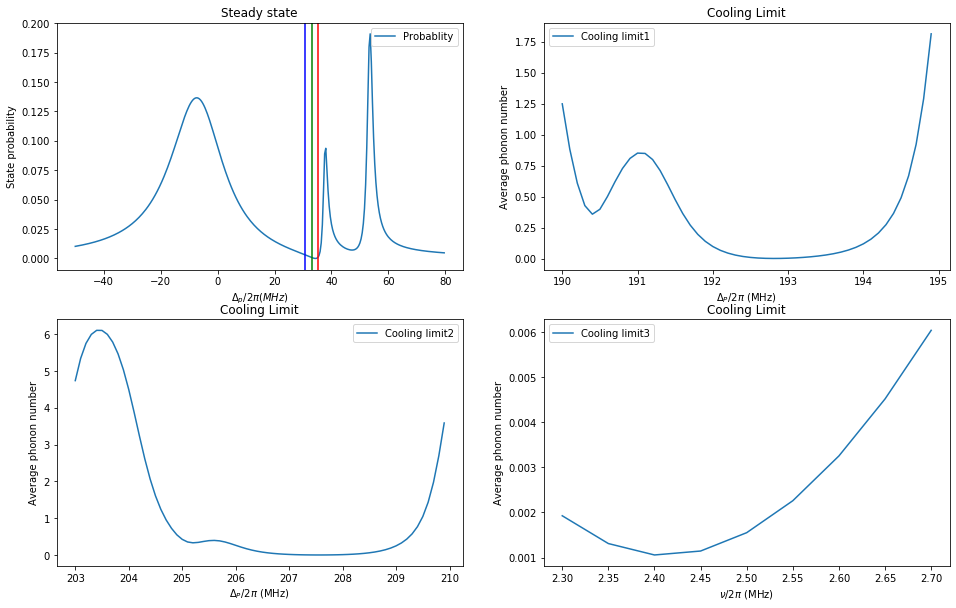

In [49]:
gammaSP = 7 #Linewith
Omega_Plus = gammaSP*1.9 # Rabi frequency
OmegaPi = gammaSP*0.2
Omega_Minus = gammaSP*1.9

Zeeman = 7.6 # Zeeman shift
Delta0 = 0
Delta_d = 42 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.4 # mode frequency
eta = 0.1

DeltaList = np.arange(-50,80,0.4)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

'''cooling_detuning_list1 = np.arange(40,48,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(55,63,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = 45.63
# Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(2.2,2.7,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))
'''
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=33, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=33+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=33-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

## If the detunning becomes 125MHz

In [21]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Temperature limit1： 0.003325
Temperature limit2： 0.012099
Delta1 =  118.59999999999985
Delta2 =  133.3999999999998
Mode frequency =  1.9500000000000002


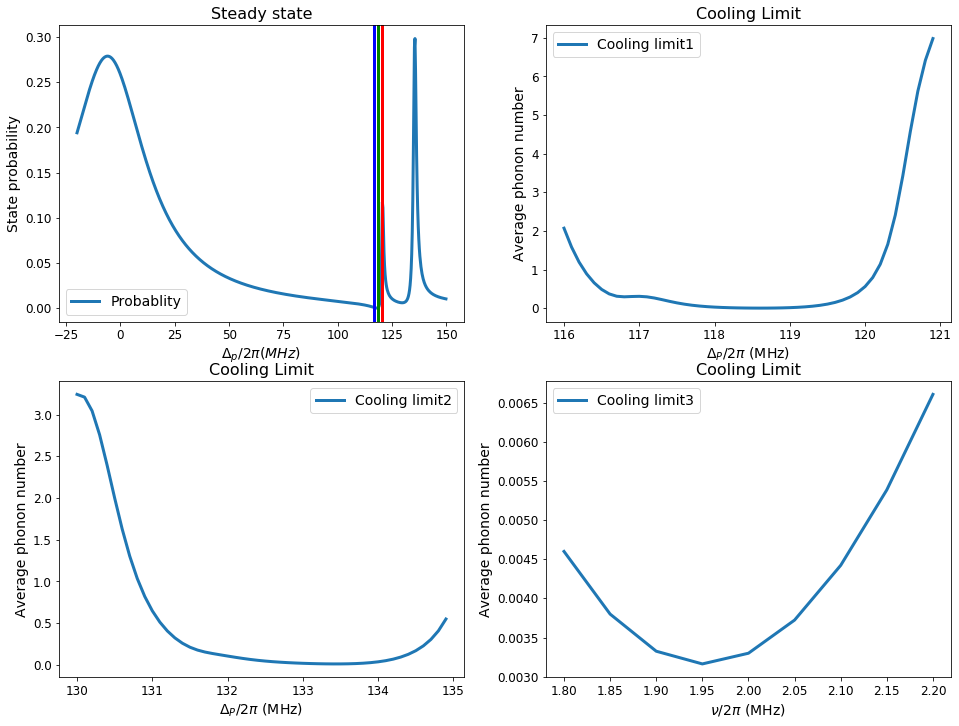

In [22]:
gammaSP = 19.7/3 #Linewith
Omega_Plus = 3*gammaSP # Rabi frequency
OmegaPi = 0.1*Omega_Plus
Omega_Minus = 3*gammaSP

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 125 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 1.9 # mode frequency
eta = 0.1

DeltaList = np.arange(-20,150,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

cooling_detuning_list1 = np.arange(116,121,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(130,135,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta1 = ',Delta1)
print('Delta2 = ',Delta2)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

In [23]:
Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3_1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta1, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3_2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta2, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

In [24]:
DeltaList = np.arange(105,145,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

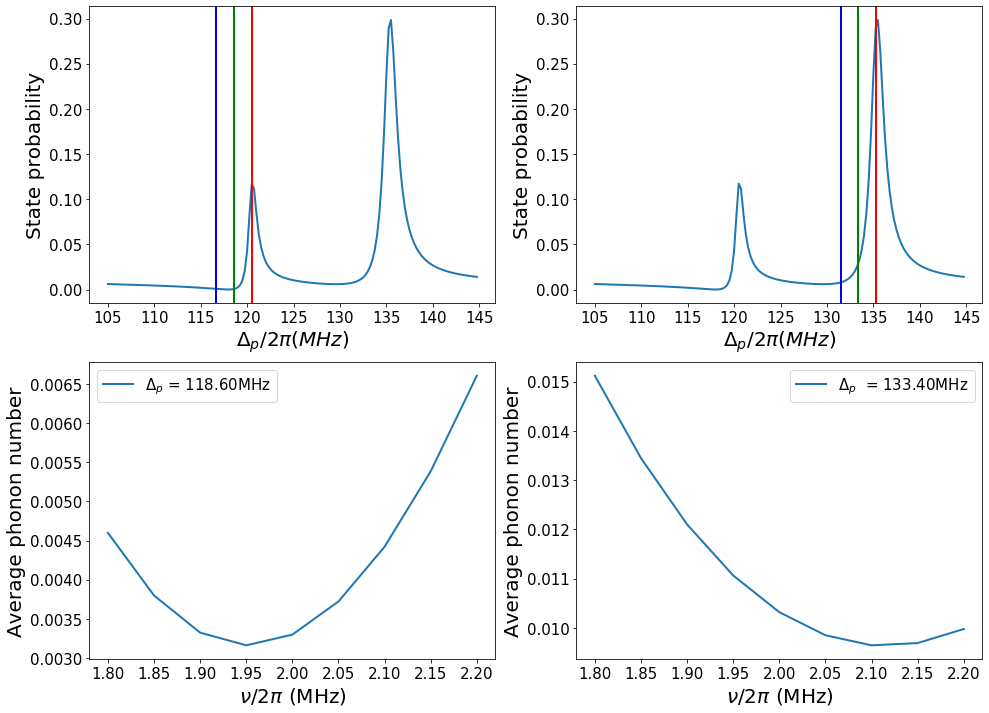

In [32]:
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.rc('figure', titlesize=20)
plt.rc('lines', linewidth=2)
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta1, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta1+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta1-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
# ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta2, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta2+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta2-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
# ax.set_title('Steady state');

ax = fig.add_subplot(2,2,3)
ax.plot(motion_frequency_list, cooling_limit_List3_1, label=r"$\Delta_p$ = "+"{:.2f}".format(Delta1)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
# ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3_2, label=r"$\Delta_p$  = "+"{:.2f}".format(Delta2)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
# ax.set_title('Cooling Limit');

# fig.savefig('EIT_125MHz.png', format='png', dpi=1200)
plt.savefig('Fig2_EIT4.png', dpi=300, bbox_inches='tight')

## Axial mode

Temperature limit1： 0.245867
Temperature limit2： 0.402445
Delta1 =  119.89999999999978
Delta2 =  132.49999999999991
Mode frequency =  0.6499999999999999


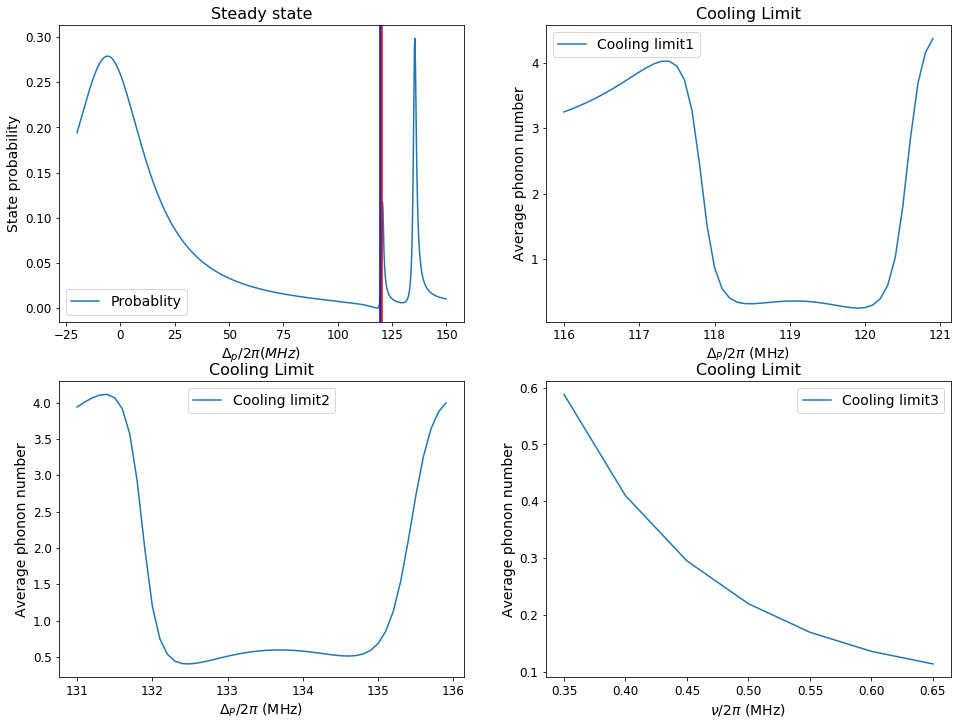

In [28]:
gammaSP = 19.7/3 #Linewith
Omega_Plus = 3*gammaSP # Rabi frequency
OmegaPi = 0.1*Omega_Plus
Omega_Minus = 3*gammaSP

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 125 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 0.48 # mode frequency
eta = 0.015

DeltaList = np.arange(-20,150,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

cooling_detuning_list1 = np.arange(116,121,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(131,136,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(0.35,0.65,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta1 = ',Delta1)
print('Delta2 = ',Delta2)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

In [29]:
Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(0.35,0.65,0.05)
cooling_limit_List3_1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta1, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
motion_frequency_list = np.arange(0.35,0.65,0.05)
cooling_limit_List3_2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta2, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]
DeltaList = np.arange(105,145,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

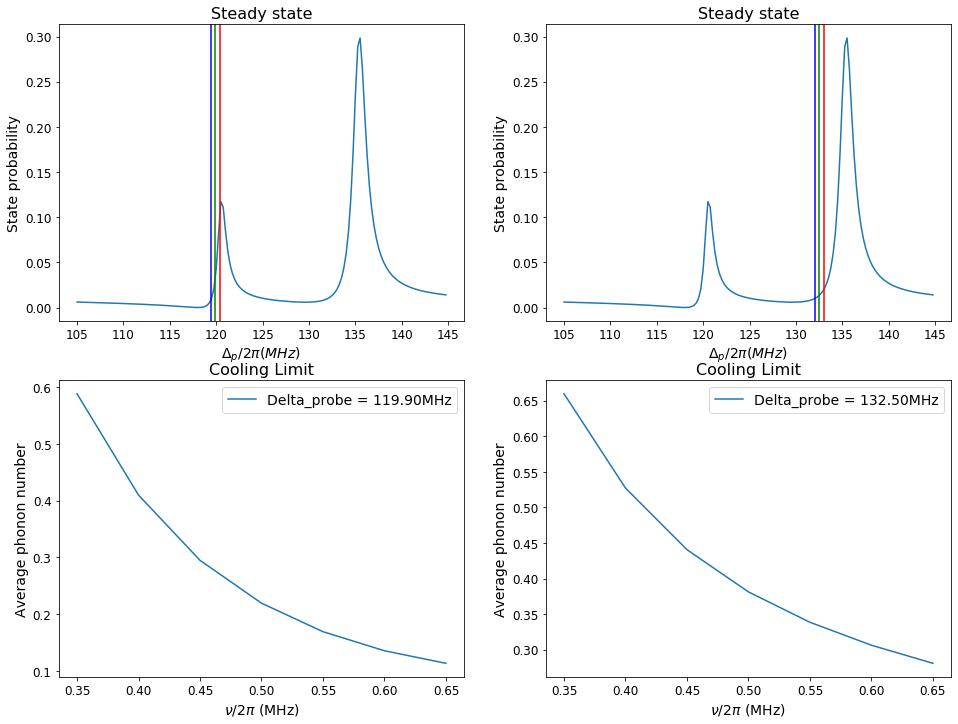

In [30]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta1, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta1+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta1-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta2, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta2+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta2-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,3)
ax.plot(motion_frequency_list, cooling_limit_List3_1, label="Delta_probe = "+"{:.2f}".format(Delta1)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3_2, label="Delta_probe = "+"{:.2f}".format(Delta2)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

# fig.savefig('EIT_125MHz.png', format='png', dpi=1200)


## If the detunning becomes 113MHz

Temperature limit1： 0.004582
Temperature limit2： 0.018063
Delta1 =  106.79999999999984
Delta2 =  121.79999999999978
Mode frequency =  1.9500000000000002


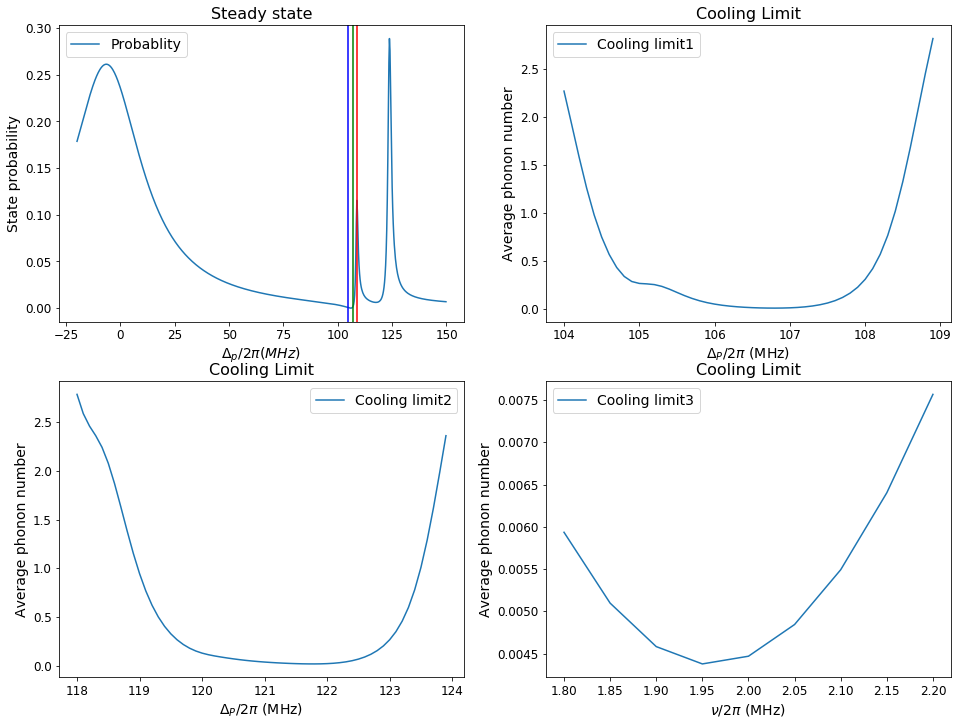

In [33]:
gammaSP = 19.7/3 #Linewith
Omega_Plus = 3*gammaSP # Rabi frequency
OmegaPi = 0.1*Omega_Plus
Omega_Minus = 3*gammaSP

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 113 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 1.9 # mode frequency
eta = 0.1

DeltaList = np.arange(-20,150,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

cooling_detuning_list1 = np.arange(104,109,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(118,124,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta1 = ',Delta1)
print('Delta2 = ',Delta2)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

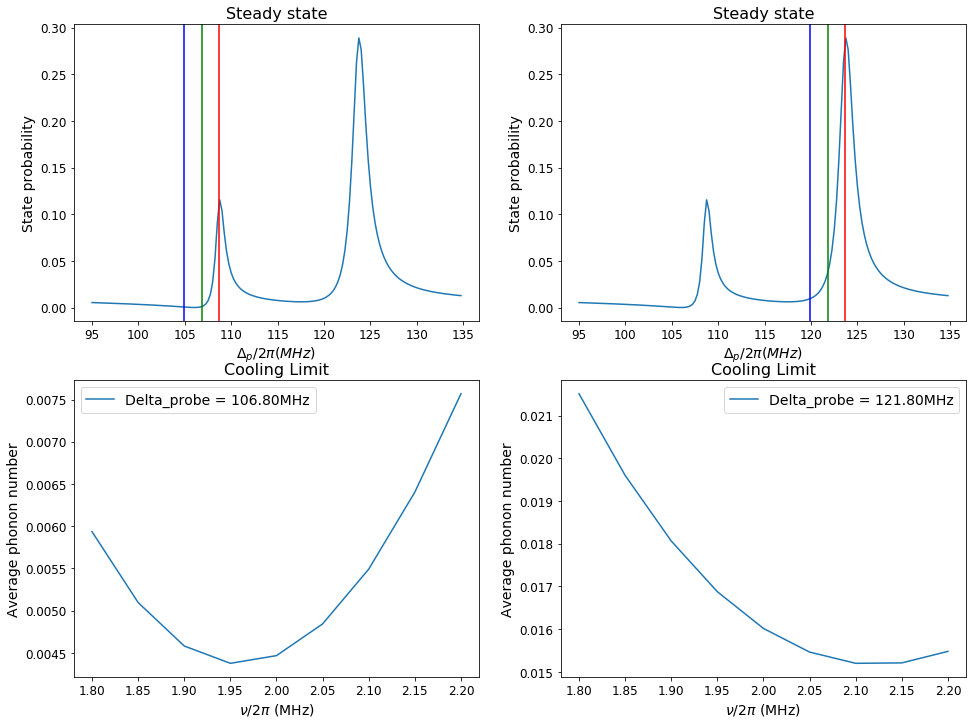

In [34]:
Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3_1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta1, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
motion_frequency_list = np.arange(1.8,2.2,0.05)
cooling_limit_List3_2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta2, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]
DeltaList = np.arange(95,135,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta1, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta1+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta1-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta2, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta2+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta2-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,3)
ax.plot(motion_frequency_list, cooling_limit_List3_1, label="Delta_probe = "+"{:.2f}".format(Delta1)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3_2, label="Delta_probe = "+"{:.2f}".format(Delta2)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

# fig.savefig('EIT_125MHz.png', format='png', dpi=1200)


### Axial modes

Temperature limit1： 0.318670
Temperature limit2： 0.489040
Delta1 =  108.09999999999977
Delta2 =  120.49999999999986
Mode frequency =  0.6499999999999999


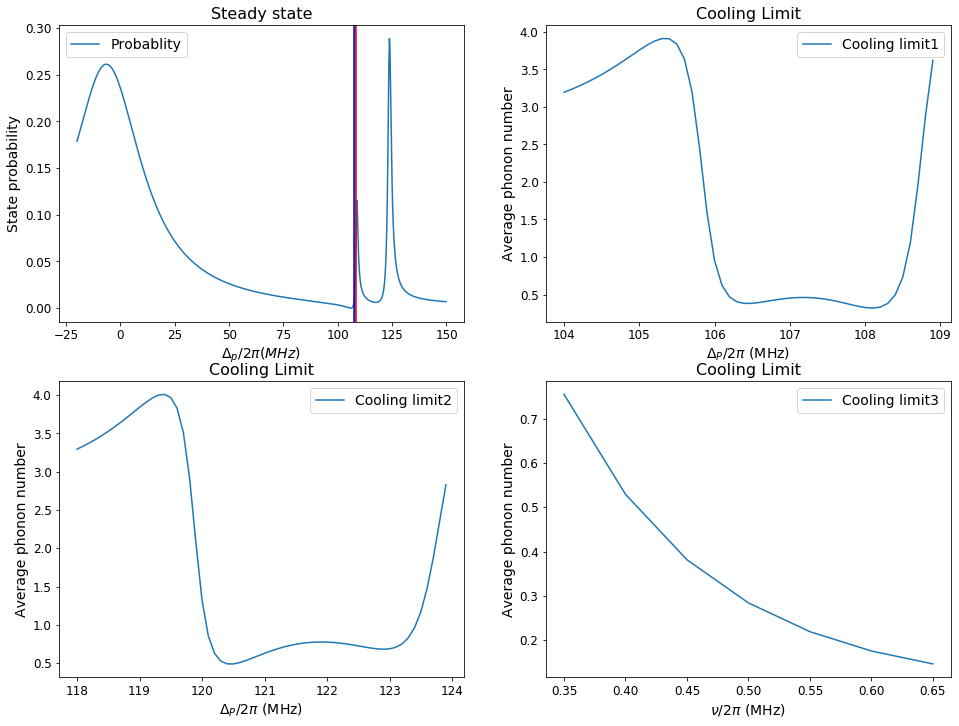

In [36]:
gammaSP = 19.7/3 #Linewith
Omega_Plus = 3*gammaSP # Rabi frequency
OmegaPi = 0.1*Omega_Plus
Omega_Minus = 3*gammaSP

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 113 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 0.48 # mode frequency
eta = 0.015

DeltaList = np.arange(-20,150,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

cooling_detuning_list1 = np.arange(104,109,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(118,124,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(0.35,0.65,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta1 = ',Delta1)
print('Delta2 = ',Delta2)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

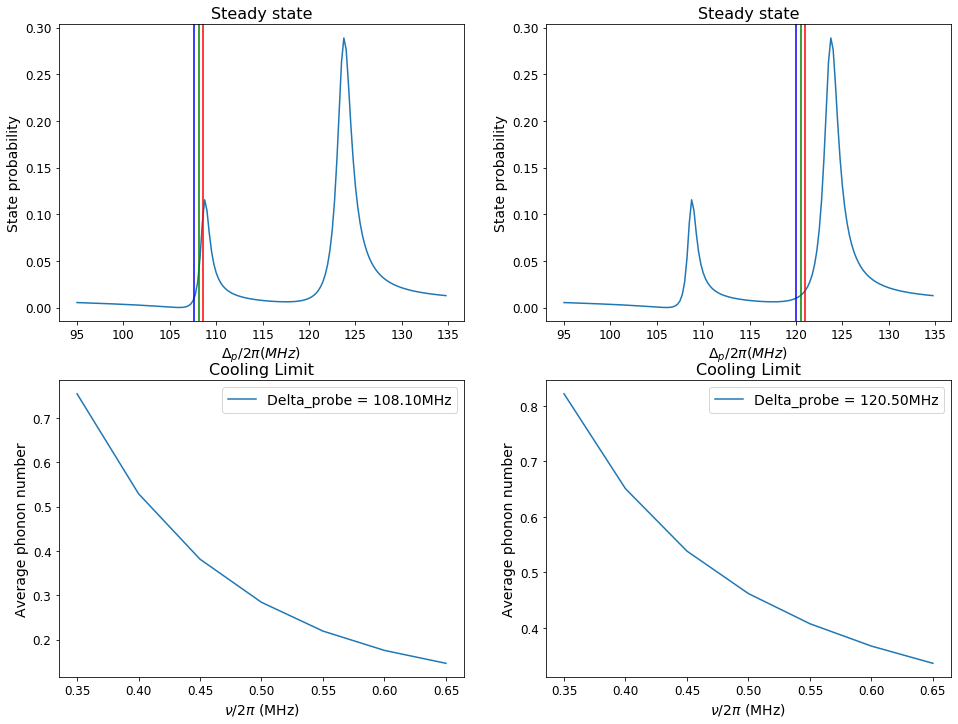

In [37]:
Delta1 = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(0.35,0.65,0.05)
cooling_limit_List3_1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta1, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

Delta2 = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
motion_frequency_list = np.arange(0.35,0.65,0.05)
cooling_limit_List3_2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta2, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]
DeltaList = np.arange(95,135,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta1, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta1+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta1-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta2, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta2+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta2-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,3)
ax.plot(motion_frequency_list, cooling_limit_List3_1, label="Delta_probe = "+"{:.2f}".format(Delta1)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3_2, label="Delta_probe = "+"{:.2f}".format(Delta2)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

# fig.savefig('EIT_125MHz.png', format='png', dpi=1200)


## If the detunning becomes 200MHz

Temperature limit1： 0.006154
Temperature limit2： 0.004900
Delta =  191.8999999999999
Mode frequency =  2.2


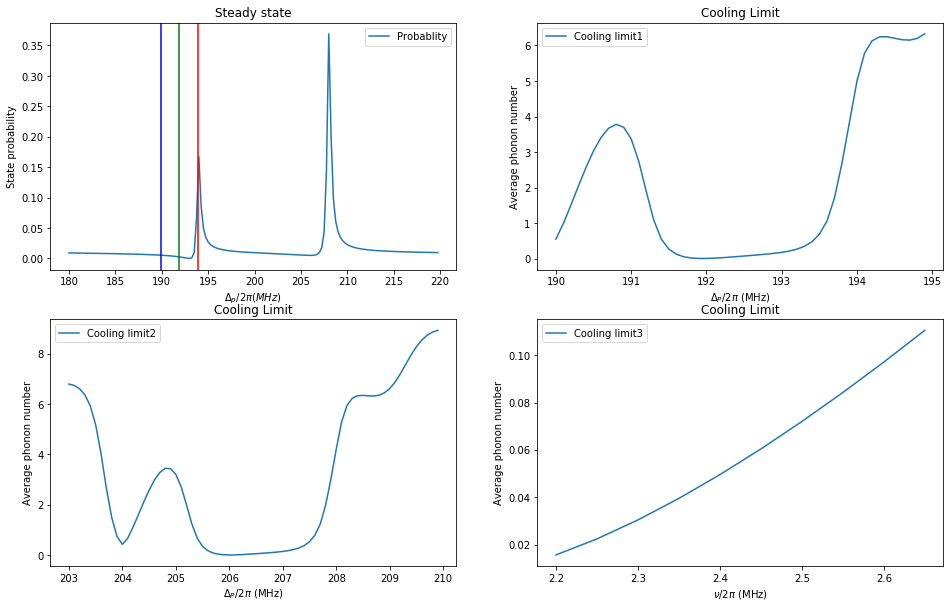

In [11]:
gammaSP = 7 #Linewith
Omega_Plus = 2*gammaSP # Rabi frequency
OmegaPi = 0.1*Omega_Plus
Omega_Minus = 2*gammaSP

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 200 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.0 # mode frequency
eta = 0.1

DeltaList = np.arange(180,220,0.25)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

cooling_detuning_list1 = np.arange(190,195,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(203,210,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(2.2,2.7,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

In [26]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

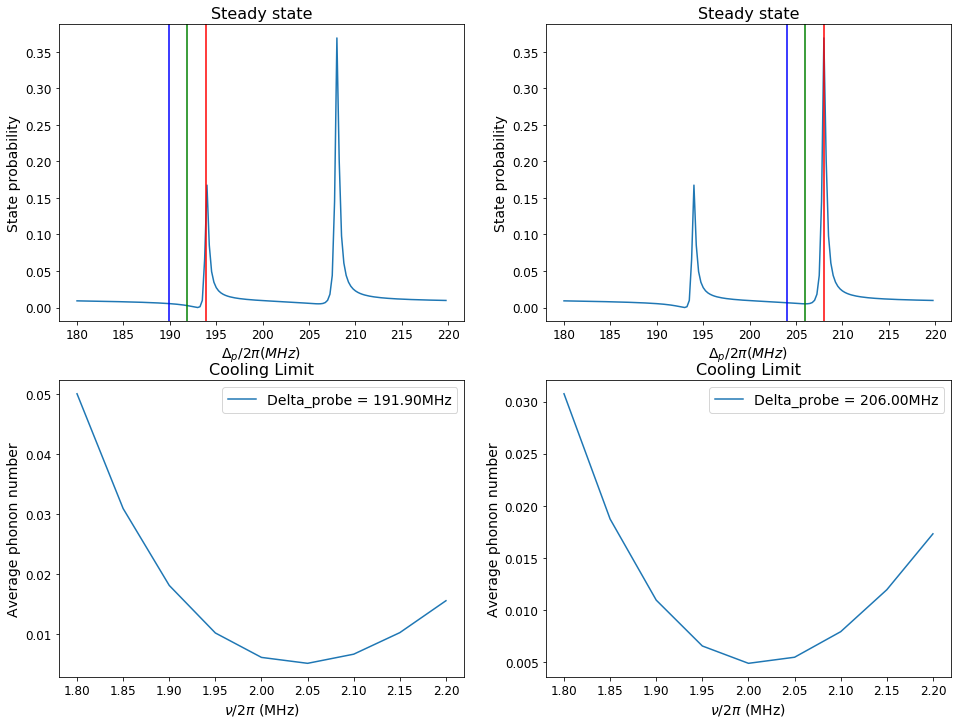

In [33]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta1, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta1+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta1-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.axvline(x=Delta2, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=Delta2+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=Delta2-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,3)
ax.plot(motion_frequency_list, cooling_limit_List3_1, label="Delta_probe = "+"{:.2f}".format(Delta1)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3_2, label="Delta_probe = "+"{:.2f}".format(Delta2)+"MHz")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

fig.savefig('EIT_200MHz.png', format='png', dpi=1200)


In [32]:
plt.savefig('EIT_200MHz.png', format='png', dpi=1200)

<Figure size 432x288 with 0 Axes>

### Maryland data

Temperature limit1： 0.497441
Temperature limit2： 0.123035
Delta =  31.100000000000044
Mode frequency =  2.6999999999999984


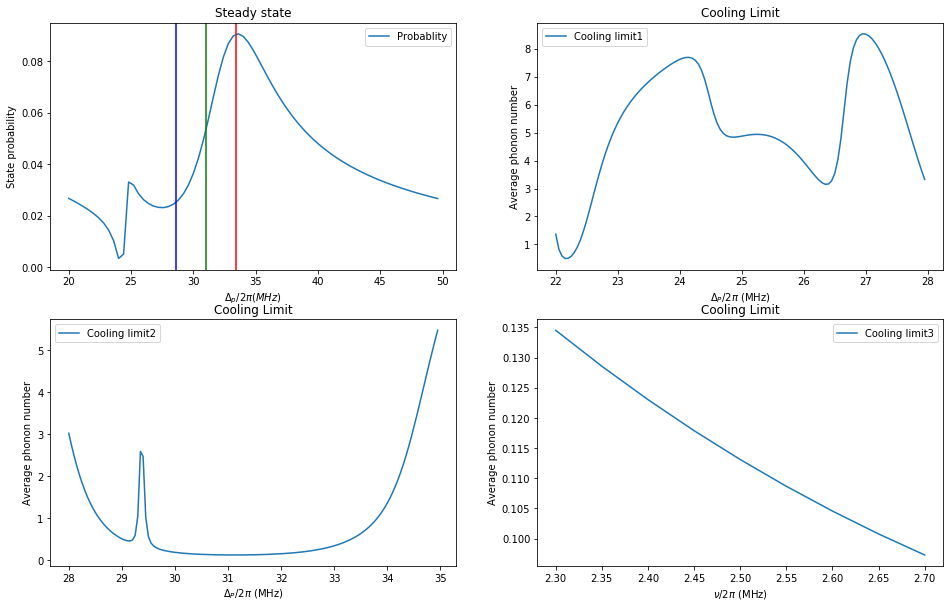

In [90]:
GammaSP = 19.7 #Linewith
gammaSP = 19.7/3
Omega_Plus = 2*gammaSP # Rabi frequency
OmegaPi = 0.35*gammaSP
Omega_Minus = 0.7*gammaSP

Zeeman = 7.7 # Zeeman shift
Delta0 = 0
Delta_d = 50 # pumping beam detuning
Delta_Minus = 3.69*gammaSP
Delta_Plus = 4.47*gammaSP
Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.4 # mode frequency
eta = 0.1

# DeltaList = np.arange(-10*gammaSP,10*gammaSP,0.4)
DeltaList = np.arange(20,50,0.4)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                            Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                          for Delta in DeltaList]

cooling_detuning_list1 = np.arange(22,28,0.05)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(28,35,0.05)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list2, np.abs(cooling_limit_List2))[0]
motion_frequency_list = np.arange(2.3,2.7,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                       Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")

center = 31
ax.axvline(x=center, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
ax.axvline(x=center+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
ax.axvline(x=center-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

## Cryo setting

Temperature limit1： 0.025301
Temperature limit2： 0.478130
Delta =  45.80000000000008
Mode frequency =  2.2500000000000004


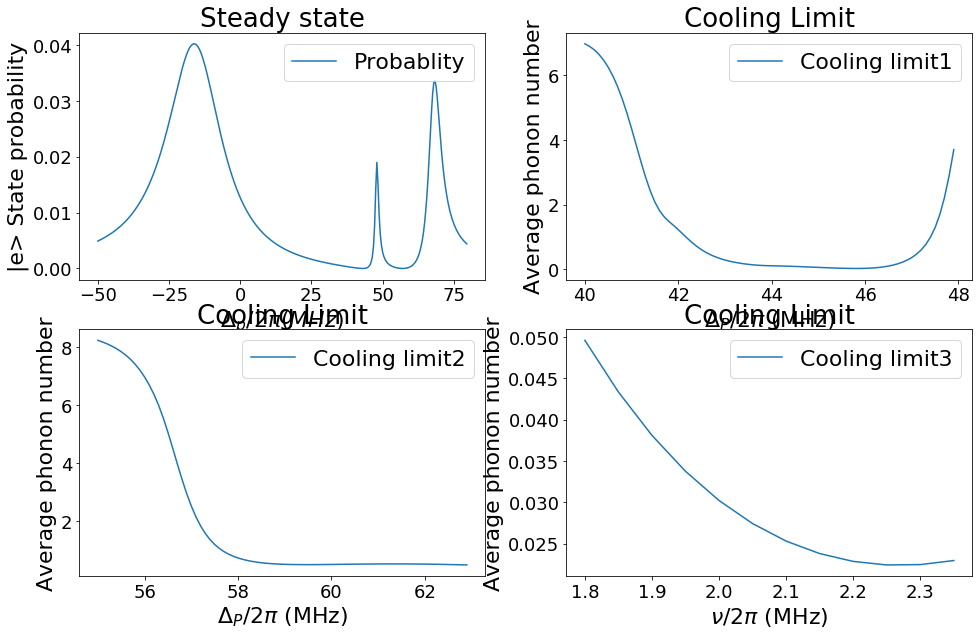

In [37]:
MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23
Omega_Plus2 = 0.85
Omega_Minus2 = 0.85

Delta = 50 # pumping beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta-Zeeman
Delta_Plus = Delta+Zeeman
Delta_P = -Delta
Delta0 = 0
nu = 2.1 # mode frequency
eta = 0.1

DeltaList = np.arange(-50,80,0.4)

StatePopulation_e = []
# StatePopulation_p = []
# StatePopulation_0 = []
# StatePopulation_m = []
for Delta in DeltaList:
    delta_dp = Delta_Minus - Delta

    rho_ss = DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, 
                                Delta0, Delta_Minus, Delta, Delta_Plus, delta_dp, gammaSP)
    StatePopulation_e.append(rho_ss.full()[0,0])
    
cooling_detuning_list1 = np.arange(40,48,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                        ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(55,63,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                        ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(1.8,2.4,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, StatePopulation_e, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('|e> State probability')
ax.set_title('Steady state')

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

# Exact power of pumping beam 

Omega_c = 0.5 * Gamma_SP
Temperature limit1： 0.076297
Omega_c = 1.0 * Gamma_SP
Temperature limit1： 0.027316
Omega_c = 1.5 * Gamma_SP
Temperature limit1： 0.013372
Omega_c = 2.0 * Gamma_SP
Temperature limit1： 0.008903
Omega_c = 2.5 * Gamma_SP
Temperature limit1： 0.009858
Omega_c = 3.0 * Gamma_SP
Temperature limit1： 0.011950
Omega_c = 3.5 * Gamma_SP
Temperature limit1： 0.013146
Omega_c = 4.0 * Gamma_SP
Temperature limit1： 0.013657
Omega_c = 4.5 * Gamma_SP
Temperature limit1： 0.013565
Omega_c = 5.0 * Gamma_SP
Temperature limit1： 0.013292


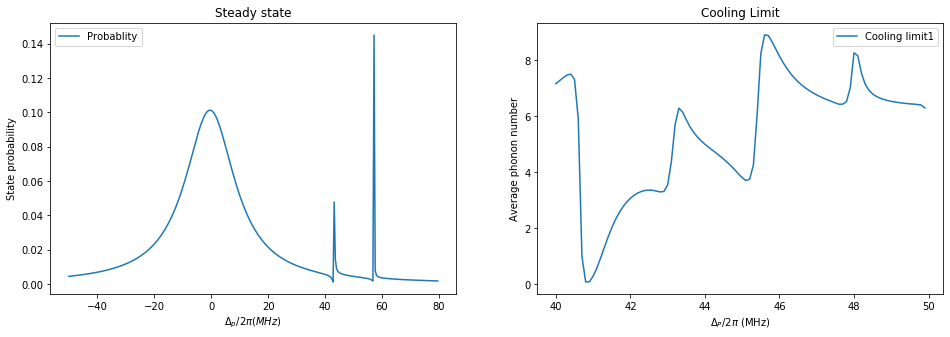

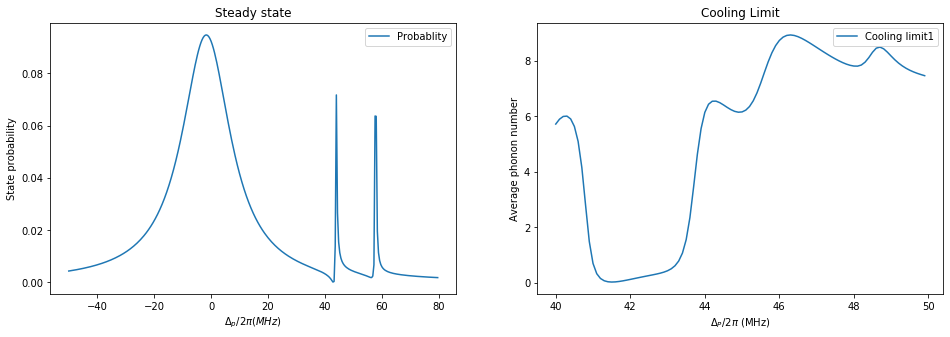

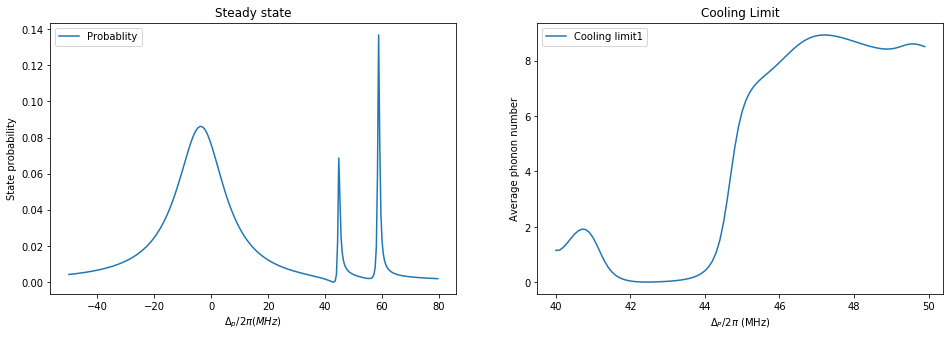

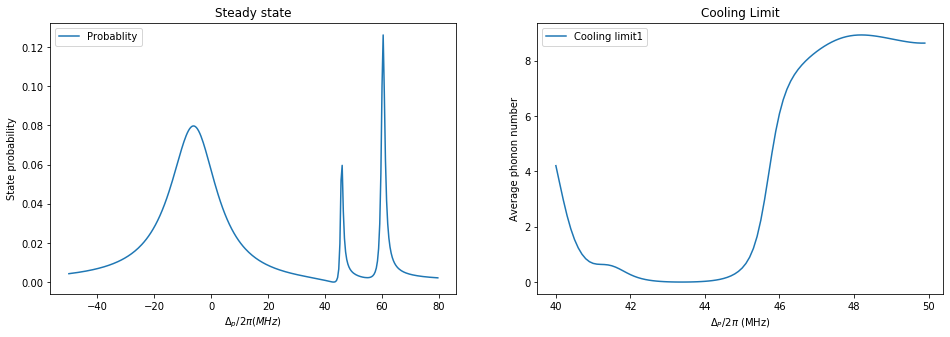

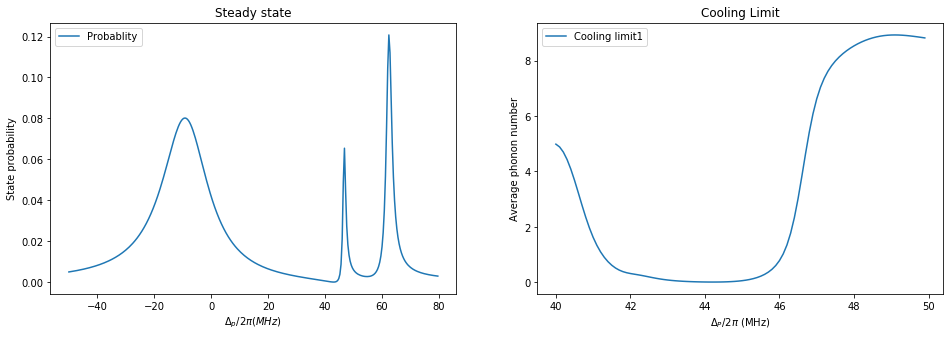

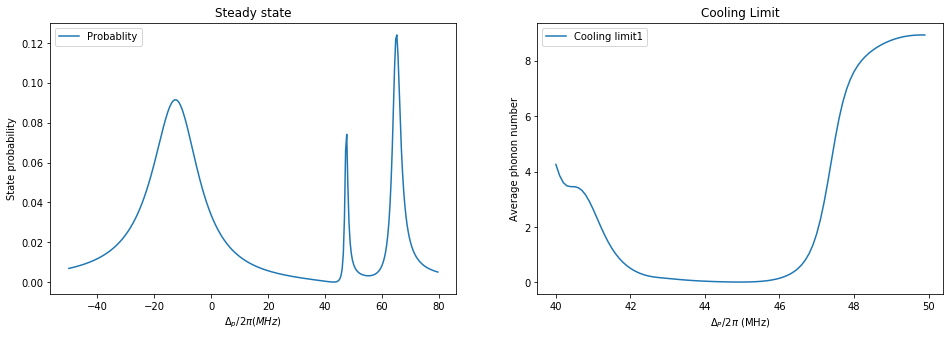

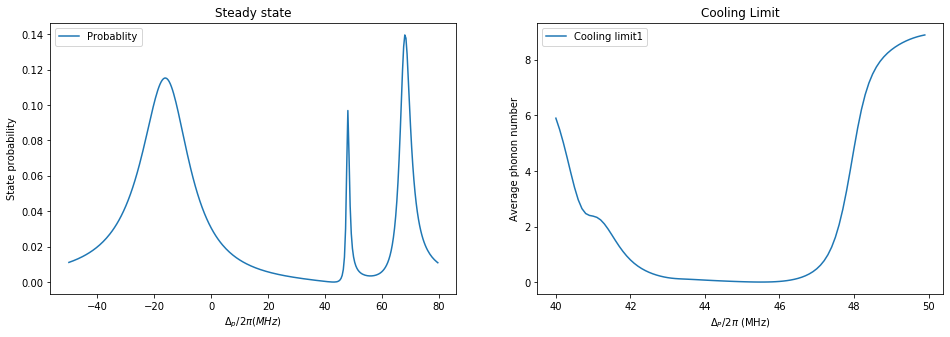

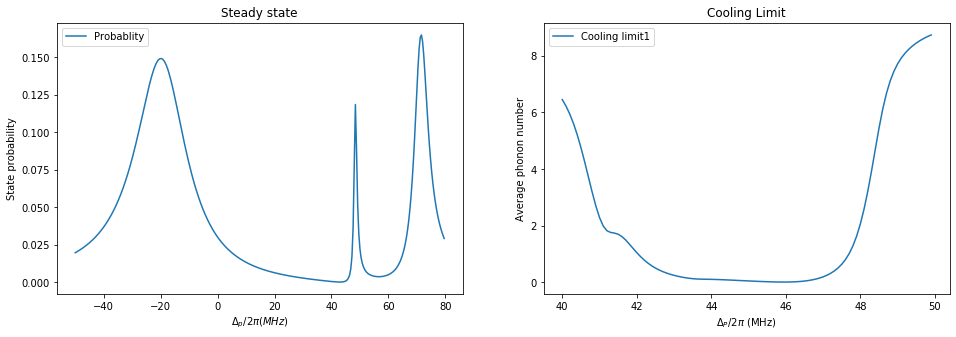

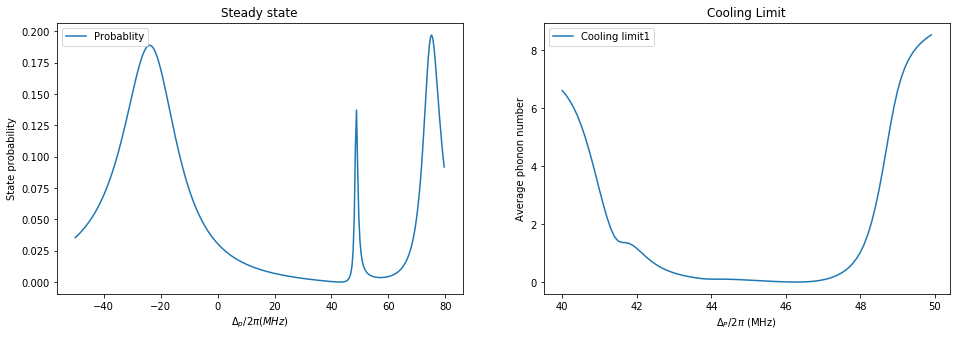

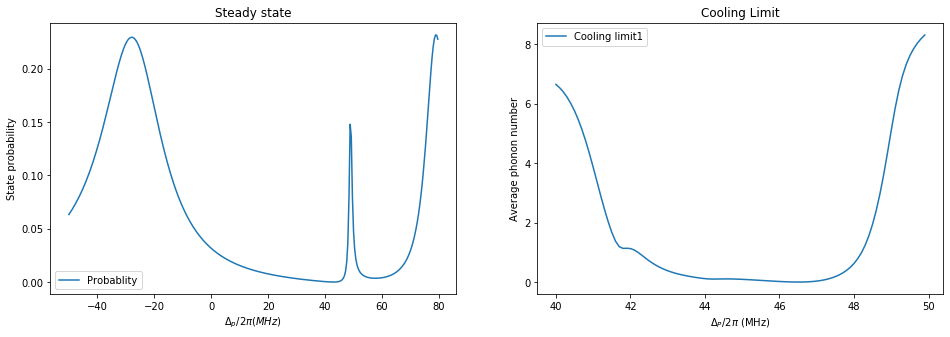

In [10]:
gammaSP = 19.7/3 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 50 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.4 # mode frequency
eta = 0.1

cooling_limits = []
ratios = np.linspace(0.5, 5, 10)
for ratio in ratios:
    print('Omega_c = '+str(round(ratio, 2))+' * Gamma_SP')
    Omega_Plus = ratio * gammaSP # Rabi frequency
    OmegaPi = 0.06 * Omega_Plus
    Omega_Minus = ratio * gammaSP

    DeltaList = np.arange(-50,80,0.4)
    ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                              for Delta in DeltaList]

    cooling_detuning_list1 = np.arange(40,50,0.1)
    cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                           Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                          ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                         for Delta in cooling_detuning_list1]

    print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))

    cooling_limits.append(cooling_limit_List1)
          
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(1,2,1)
    ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
#     ax.axvline(x=45.63, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
#     ax.axvline(x=45.63+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
#     ax.axvline(x=45.63-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
    ax.legend()
    ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
    ax.set_ylabel('State probability')
    ax.set_title('Steady state');

    ax = fig.add_subplot(1,2,2)
    ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
    ax.legend()
    ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
    ax.set_ylabel('Average phonon number')
    ax.set_title('Cooling Limit');

Text(0, 0.5, 'Final average phonon number')

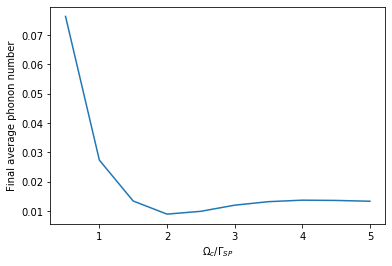

In [19]:
min_avg_num = []
for cooling_data in cooling_limits:
    min_avg_num.append(np.min(np.abs(cooling_data)))
plt.plot(ratios, min_avg_num)
plt.xlabel('$\Omega_c/\Gamma_{SP}$')
plt.ylabel('Final average phonon number')

## Delta_d = 125MHz

  0%|          | 0/10 [00:00<?, ?it/s]

Omega_c = 0.5 * Gamma_SP


 10%|█         | 1/10 [02:32<22:48, 152.07s/it]

Temperature limit1： 0.558009
Omega_c = 1.0 * Gamma_SP


 20%|██        | 2/10 [04:54<19:54, 149.31s/it]

Temperature limit1： 0.021964
Omega_c = 1.5 * Gamma_SP


 30%|███       | 3/10 [07:22<17:20, 148.70s/it]

Temperature limit1： 0.008691
Omega_c = 2.0 * Gamma_SP


 40%|████      | 4/10 [09:51<14:52, 148.80s/it]

Temperature limit1： 0.005629
Omega_c = 2.5 * Gamma_SP


 50%|█████     | 5/10 [12:20<12:25, 149.01s/it]

Temperature limit1： 0.002852
Omega_c = 3.0 * Gamma_SP


 60%|██████    | 6/10 [14:51<09:57, 149.49s/it]

Temperature limit1： 0.003299
Omega_c = 3.5 * Gamma_SP


 70%|███████   | 7/10 [17:20<07:28, 149.42s/it]

Temperature limit1： 0.006018
Omega_c = 4.0 * Gamma_SP


 80%|████████  | 8/10 [19:49<04:58, 149.15s/it]

Temperature limit1： 0.010019
Omega_c = 4.5 * Gamma_SP


 90%|█████████ | 9/10 [22:20<02:29, 149.94s/it]

Temperature limit1： 0.015645
Omega_c = 5.0 * Gamma_SP


100%|██████████| 10/10 [24:51<00:00, 149.20s/it]

Temperature limit1： 0.021078


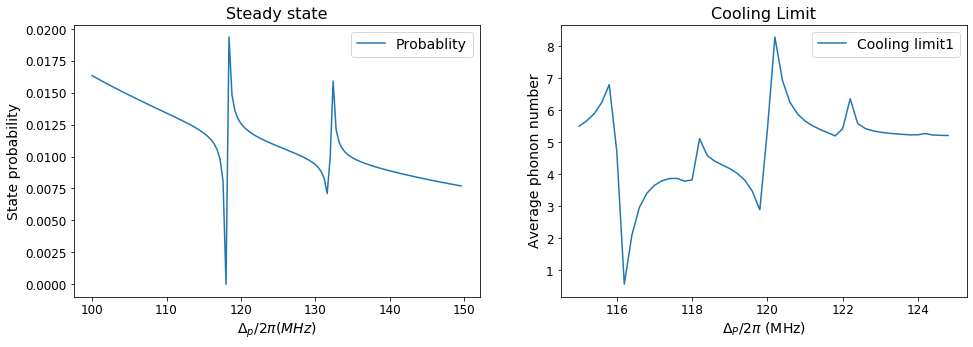

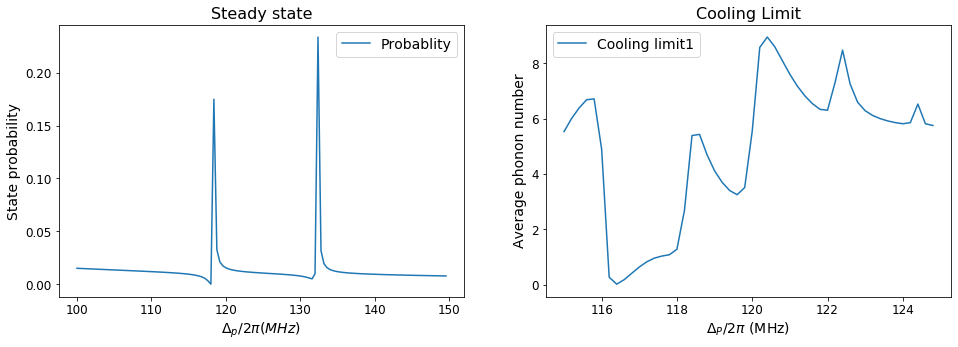

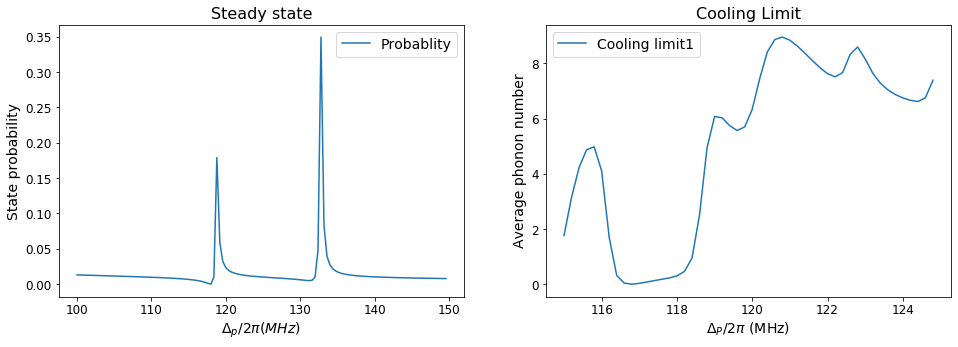

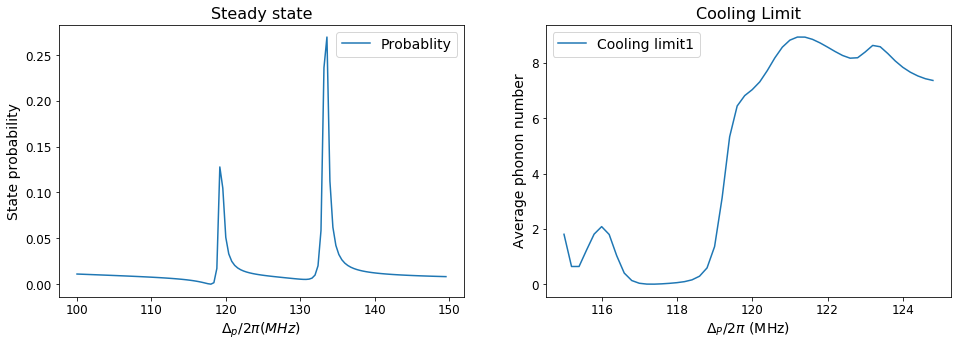

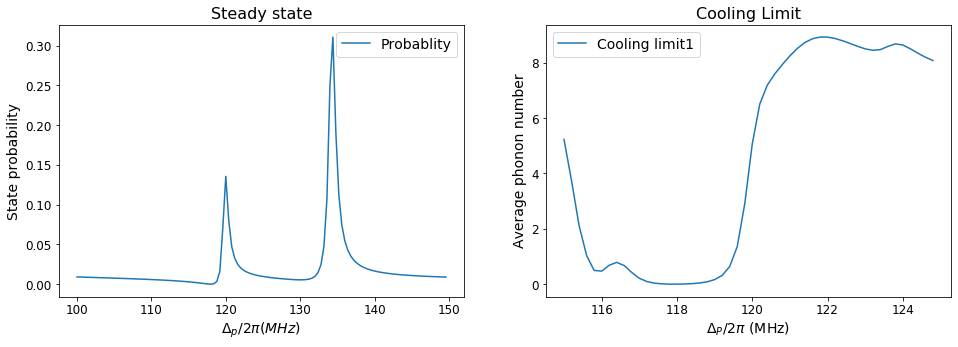

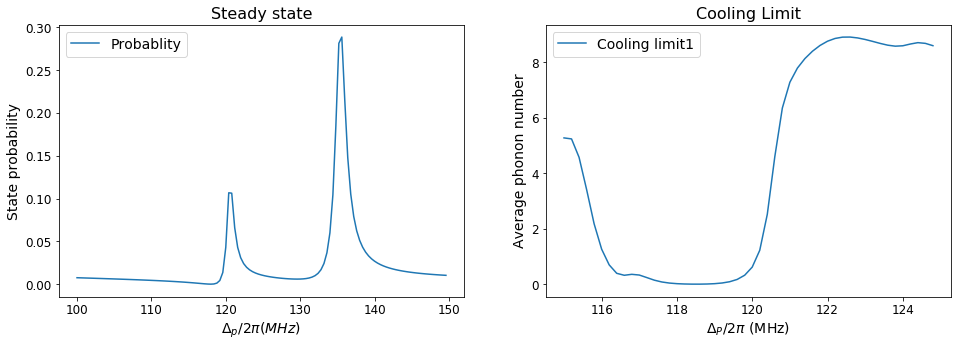

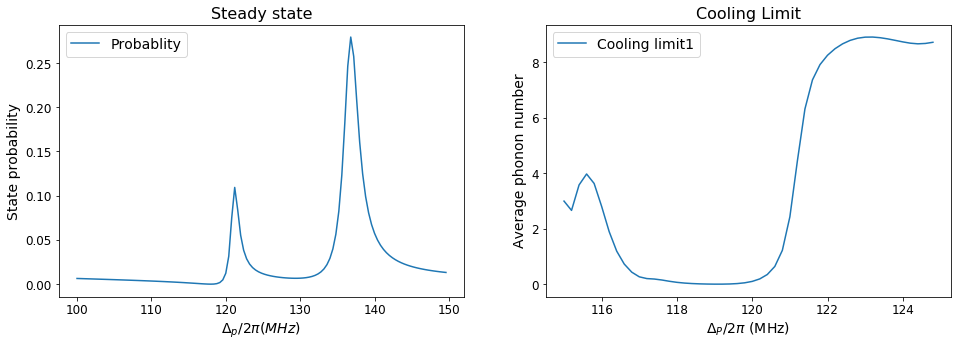

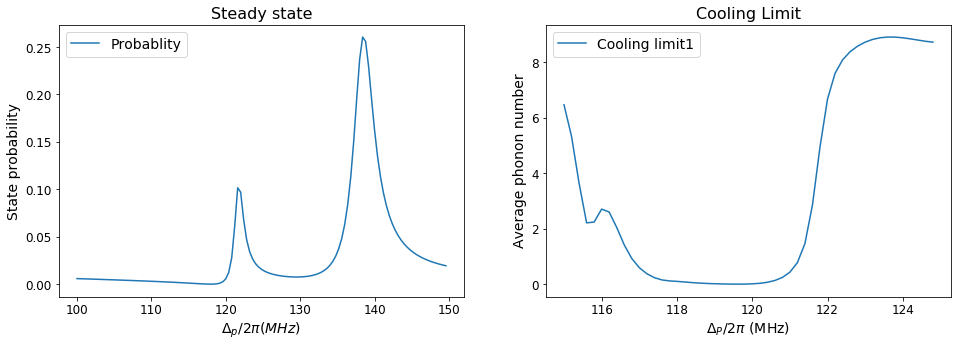

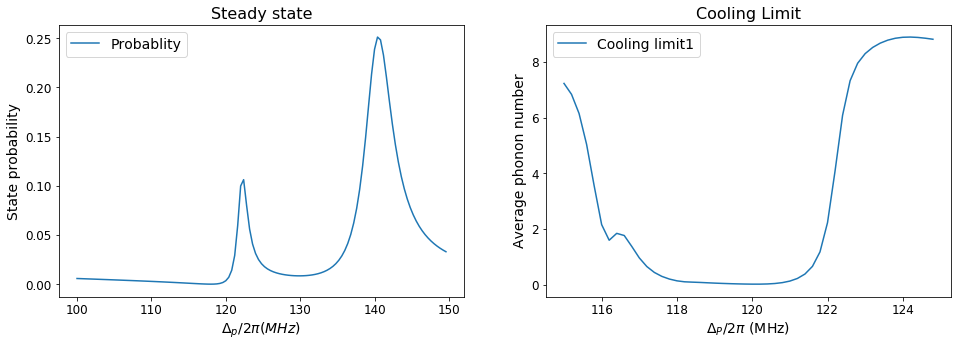

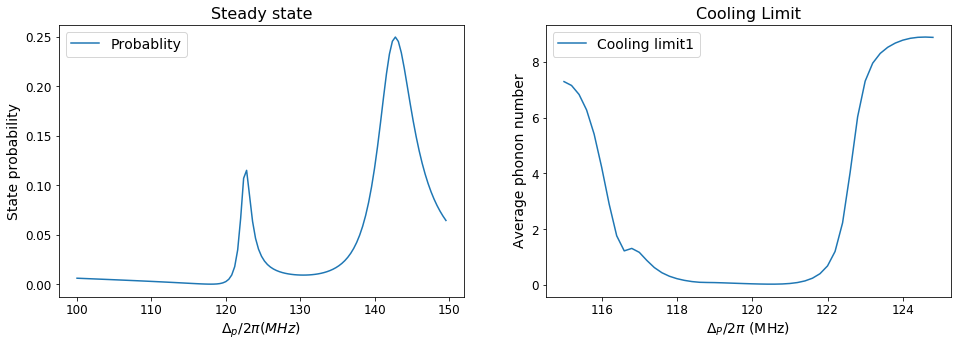

In [59]:
from tqdm import tqdm
gammaSP = 19.7/3 #Linewith

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 125 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.0 # mode frequency
eta = 0.1

cooling_limits = []
ratios = np.linspace(0.5, 5, 10)
for ratio in tqdm(ratios):
    print('Omega_c = '+str(round(ratio, 2))+' * Gamma_SP')
    Omega_Plus = ratio * gammaSP # Rabi frequency
    OmegaPi = 0.1 * Omega_Plus
    Omega_Minus = ratio * gammaSP

    DeltaList = np.arange(100,150,0.4)
    ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                              for Delta in DeltaList]

    cooling_detuning_list1 = np.arange(115,125,0.2)
    cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                           Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                          ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                         for Delta in cooling_detuning_list1]
    
    Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
    print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))

    cooling_limits.append(cooling_limit_List1)
          
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(1,2,1)
    ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
    ax.legend()
    ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
    ax.set_ylabel('State probability')
    ax.set_title('Steady state');

    ax = fig.add_subplot(1,2,2)
    ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
    ax.legend()
    ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
    ax.set_ylabel('Average phonon number')
    ax.set_title('Cooling Limit');

Text(0, 0.5, 'Final average phonon number')

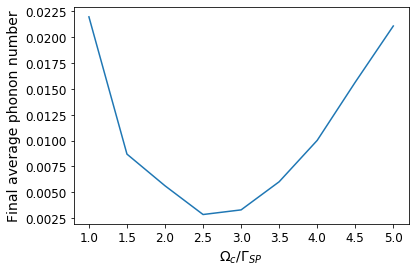

In [61]:
# min_avg_num_1 = []
# for cooling_data in cooling_limits:
#     min_avg_num_1.append(np.min(np.abs(cooling_data)))
plt.plot(ratios[1:], min_avg_num_1[1:])
plt.xlabel('$\Omega_c/\Gamma_{SP}$')
plt.ylabel('Final average phonon number')

  0%|          | 0/10 [00:00<?, ?it/s]

Omega_c = 0.5 * Gamma_SP


 10%|█         | 1/10 [02:16<20:27, 136.40s/it]

Temperature limit1： 0.722492
Omega_c = 1.0 * Gamma_SP


 20%|██        | 2/10 [04:30<18:05, 135.68s/it]

Temperature limit1： 0.033956
Omega_c = 1.5 * Gamma_SP


 30%|███       | 3/10 [06:51<16:00, 137.22s/it]

Temperature limit1： 0.008769
Omega_c = 2.0 * Gamma_SP


 40%|████      | 4/10 [09:11<13:48, 138.02s/it]

Temperature limit1： 0.004182
Omega_c = 2.5 * Gamma_SP


 50%|█████     | 5/10 [11:35<11:39, 139.80s/it]

Temperature limit1： 0.003766
Omega_c = 3.0 * Gamma_SP


 60%|██████    | 6/10 [13:51<09:14, 138.67s/it]

Temperature limit1： 0.010317
Omega_c = 3.5 * Gamma_SP


 70%|███████   | 7/10 [16:06<06:52, 137.59s/it]

Temperature limit1： 0.031269
Omega_c = 4.0 * Gamma_SP


 80%|████████  | 8/10 [18:21<04:34, 137.02s/it]

Temperature limit1： 0.074136
Omega_c = 4.5 * Gamma_SP


 90%|█████████ | 9/10 [20:36<02:16, 136.42s/it]

Temperature limit1： 0.147230
Omega_c = 5.0 * Gamma_SP


100%|██████████| 10/10 [22:51<00:00, 137.15s/it]

Temperature limit1： 0.265652


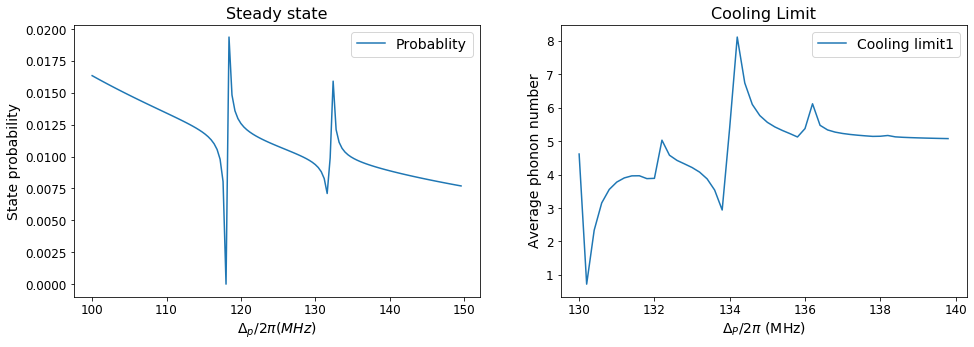

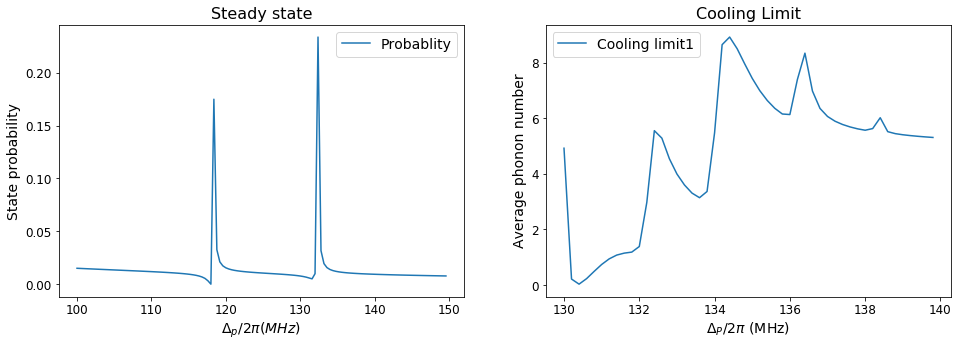

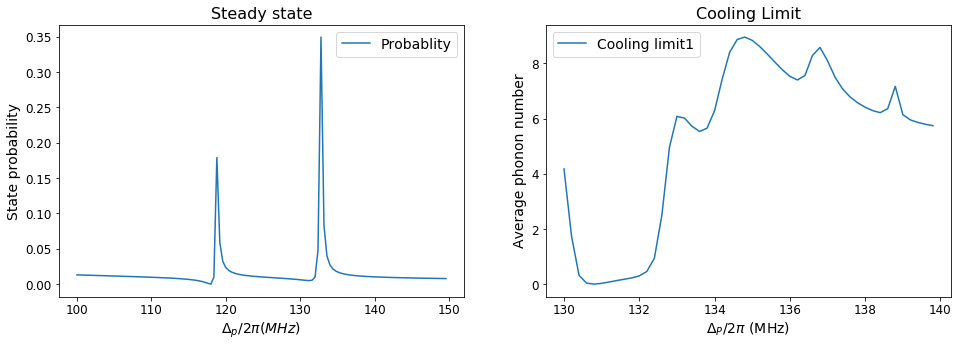

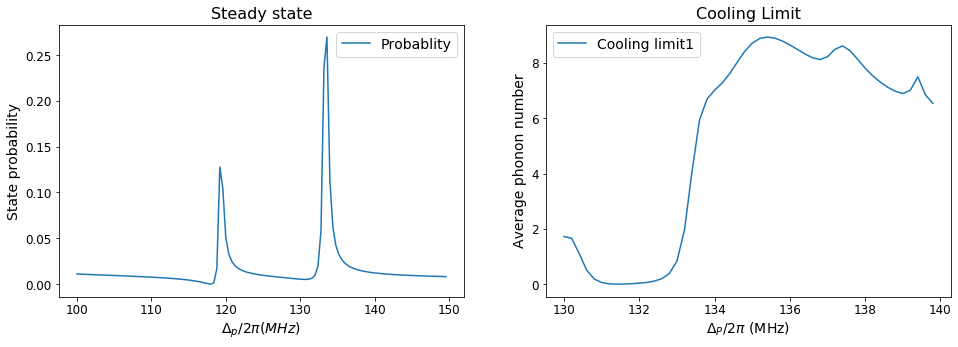

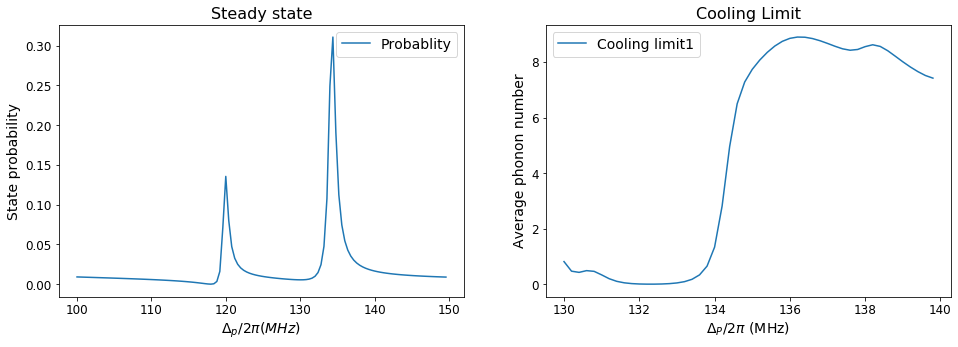

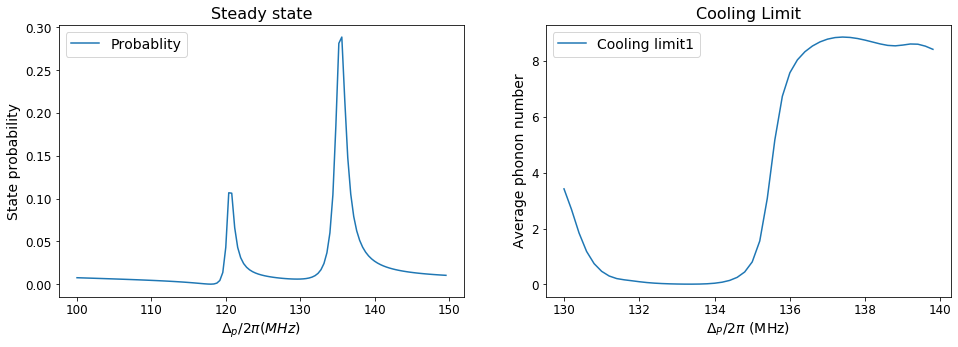

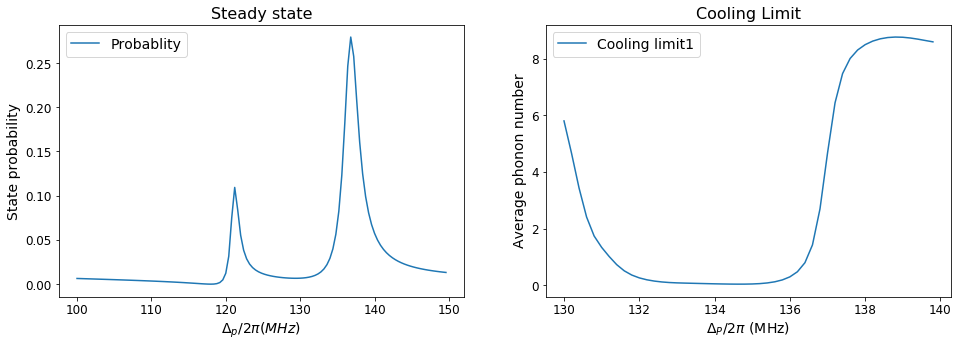

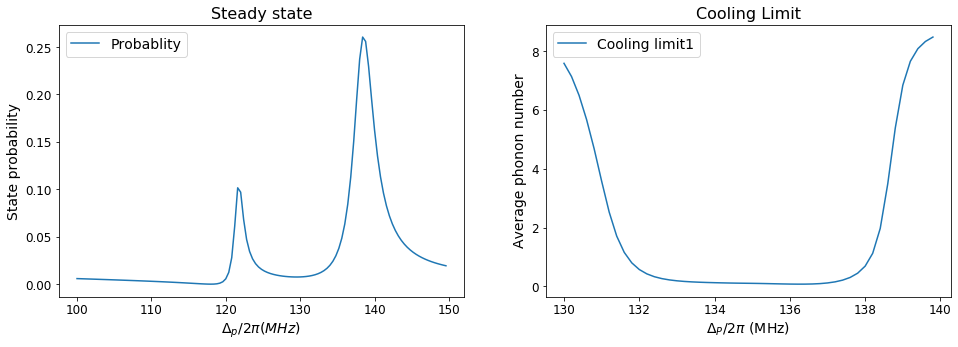

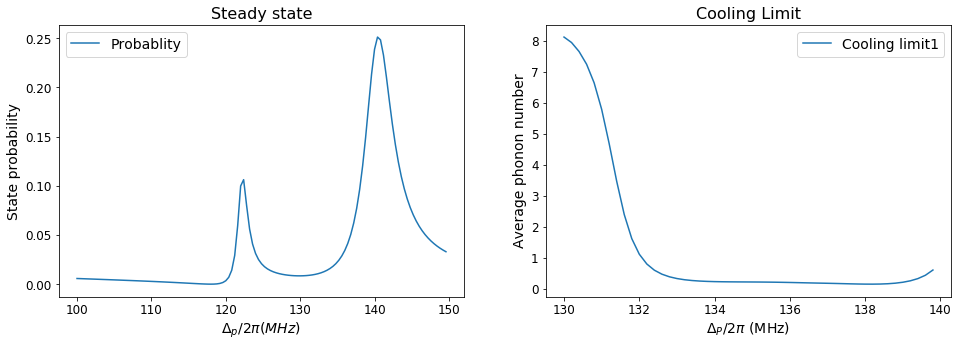

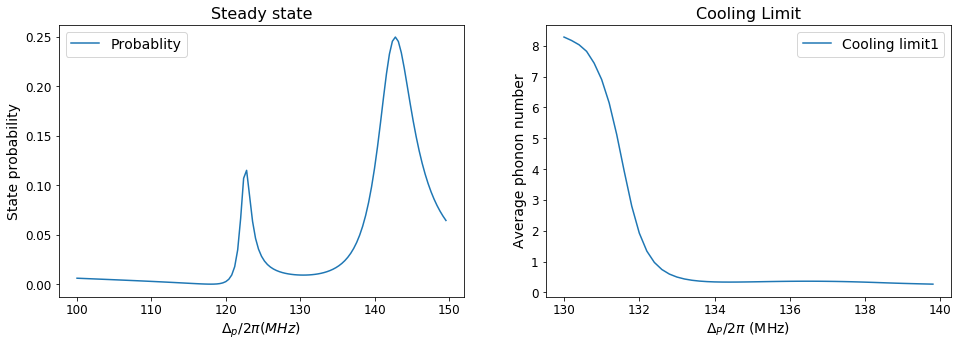

In [62]:
gammaSP = 19.7/3 #Linewith

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 125 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.0 # mode frequency
eta = 0.1

cooling_limits = []
ratios = np.linspace(0.5, 5, 10)
for ratio in tqdm(ratios):
    print('Omega_c = '+str(round(ratio, 2))+' * Gamma_SP')
    Omega_Plus = ratio * gammaSP # Rabi frequency
    OmegaPi = 0.1 * Omega_Plus
    Omega_Minus = ratio * gammaSP

    DeltaList = np.arange(100,150,0.4)
    ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                              for Delta in DeltaList]

    cooling_detuning_list1 = np.arange(130,140,0.2)
    cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                           Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                          ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                         for Delta in cooling_detuning_list1]
    
    Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
    print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))

    cooling_limits.append(cooling_limit_List1)
          
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(1,2,1)
    ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
#     ax.axvline(x=45.63, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
#     ax.axvline(x=45.63+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
#     ax.axvline(x=45.63-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
    ax.legend()
    ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
    ax.set_ylabel('State probability')
    ax.set_title('Steady state');

    ax = fig.add_subplot(1,2,2)
    ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
    ax.legend()
    ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
    ax.set_ylabel('Average phonon number')
    ax.set_title('Cooling Limit');

Text(0, 0.5, 'Final average phonon number')

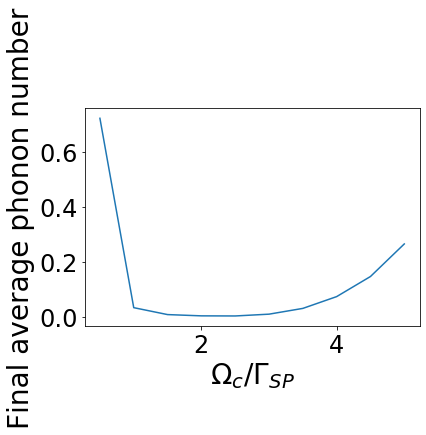

In [73]:
min_avg_num_2 = []
for cooling_data in cooling_limits:
    min_avg_num_2.append(np.min(np.abs(cooling_data)))
ratios = np.linspace(0.5, 5, 10)
plt.plot(ratios, min_avg_num_2)
plt.xlabel('$\Omega_c/\Gamma_{SP}$')
plt.ylabel('Final average phonon number')

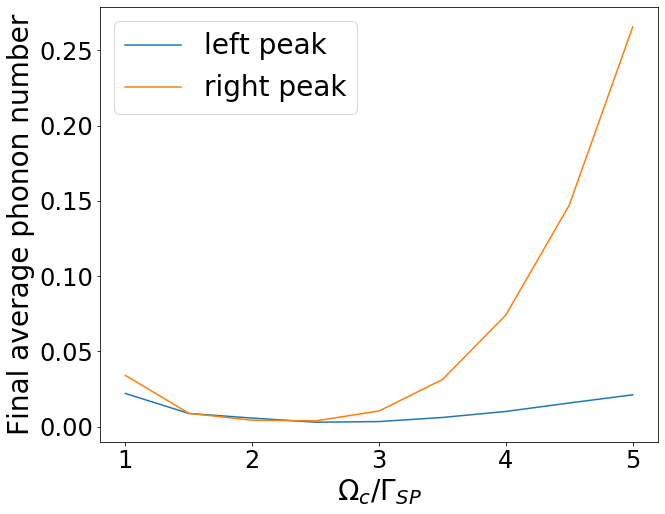

In [74]:
SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 32

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize = (10,8))
plt.plot(ratios[1:], min_avg_num_1[1:],label = 'left peak')
plt.plot(ratios[1:], min_avg_num_2[1:],label = 'right peak')
plt.xlabel('$\Omega_c/\Gamma_{SP}$')
plt.ylabel('Final average phonon number')
plt.legend()

## Delta_d = 200MHz

Omega_c = 0.5 * Gamma_SP
Temperature limit1： 0.347564
Omega_c = 1.0 * Gamma_SP
Temperature limit1： 0.013752
Omega_c = 1.5 * Gamma_SP
Temperature limit1： 0.009167
Omega_c = 2.0 * Gamma_SP
Temperature limit1： 0.005590
Omega_c = 2.5 * Gamma_SP
Temperature limit1： 0.002819
Omega_c = 3.0 * Gamma_SP
Temperature limit1： 0.001730
Omega_c = 3.5 * Gamma_SP
Temperature limit1： 0.004607
Omega_c = 4.0 * Gamma_SP
Temperature limit1： 0.013787
Omega_c = 4.5 * Gamma_SP
Temperature limit1： 0.058060
Omega_c = 5.0 * Gamma_SP
Temperature limit1： 0.121099


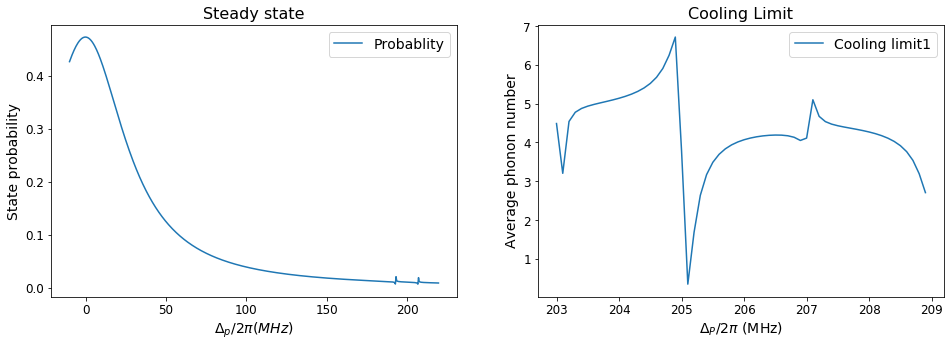

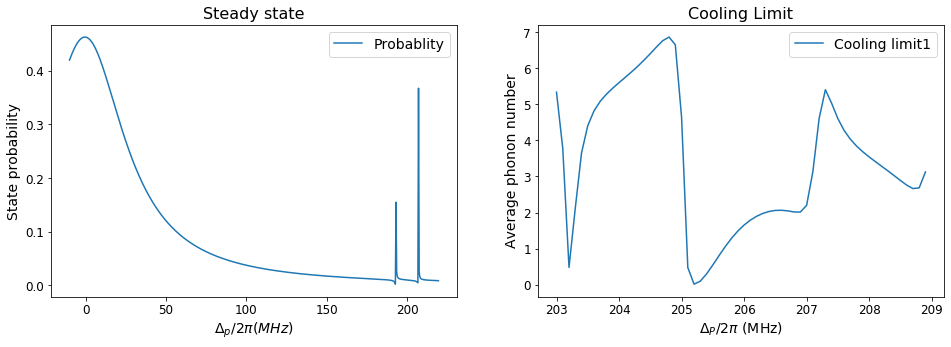

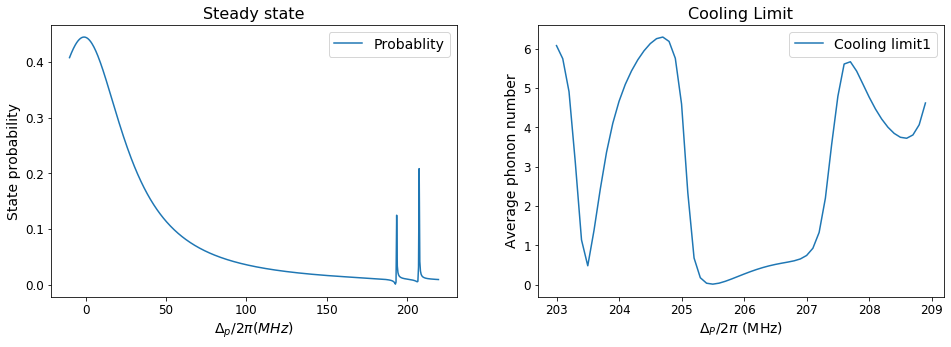

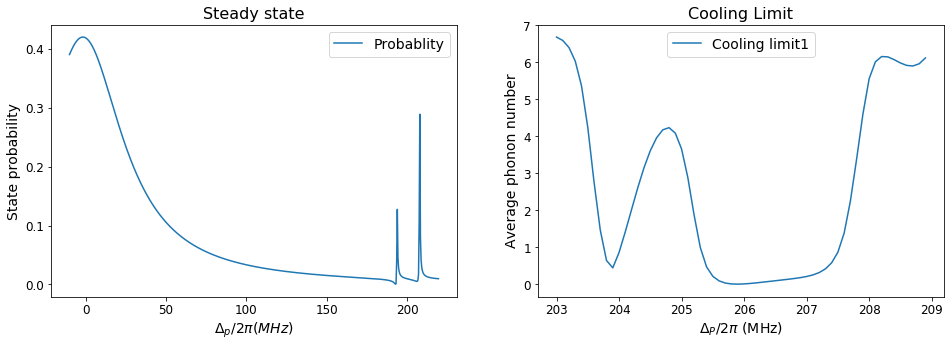

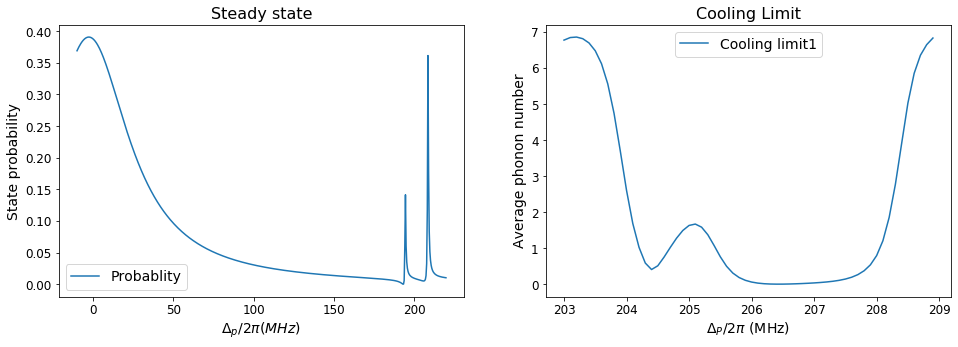

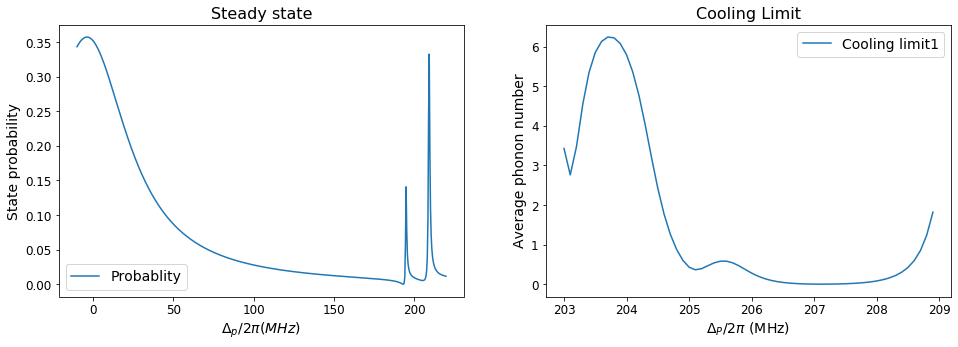

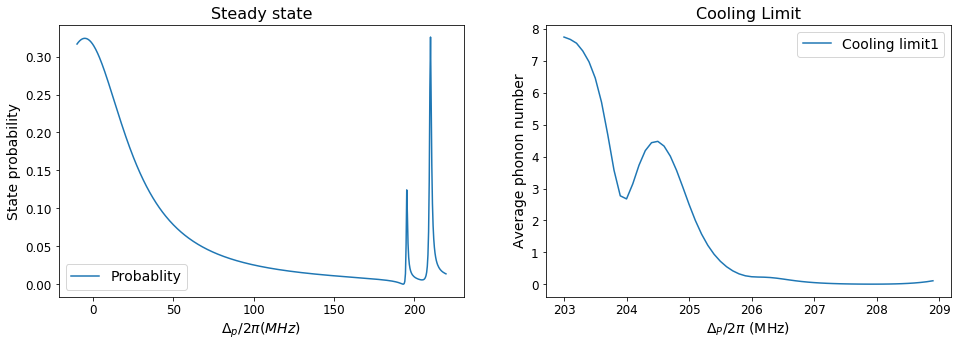

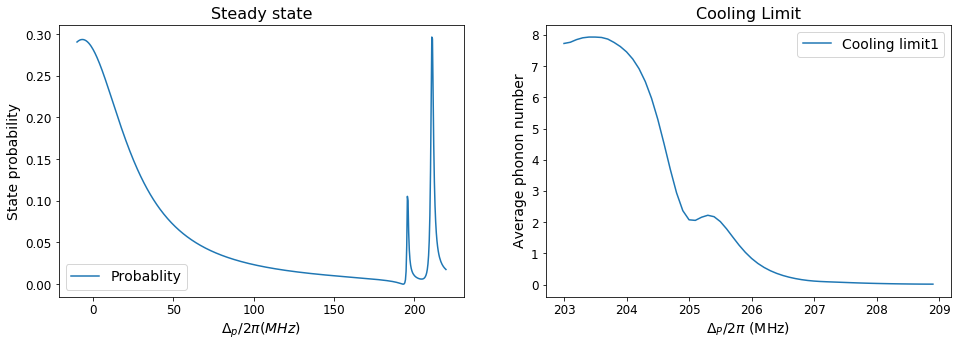

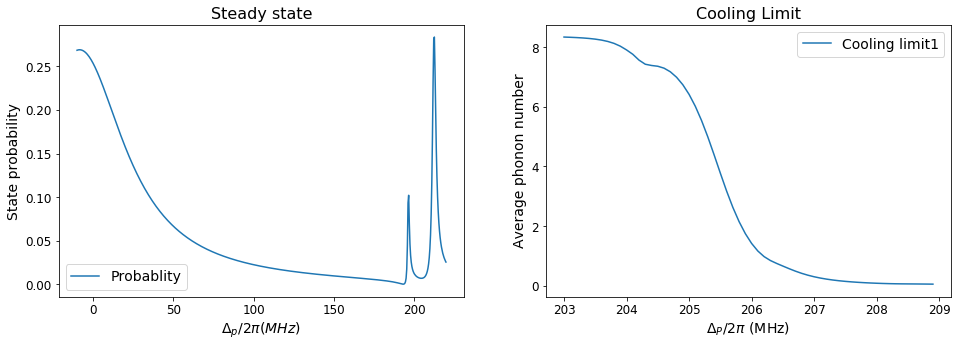

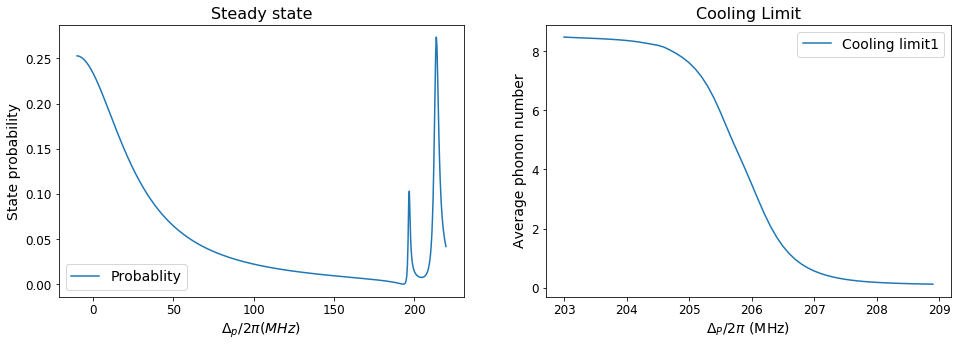

In [38]:
gammaSP = 19.7/3 #Linewith

Zeeman = 7 # Zeeman shift
Delta0 = 0
Delta_d = 200 # pumping beam detuning
Delta_Minus = Delta_d-Zeeman
Delta_Plus = Delta_d+Zeeman
# Delta_P = Delta # Probe beam detunning, which will be scanned in the later loop

nu = 2.0 # mode frequency
eta = 0.1

cooling_limits = []
ratios = np.linspace(0.5, 5, 10)
for ratio in ratios:
    print('Omega_c = '+str(round(ratio, 2))+' * Gamma_SP')
    Omega_Plus = ratio * gammaSP # Rabi frequency
    OmegaPi = 0.1 * Omega_Plus
    Omega_Minus = ratio * gammaSP

    DeltaList = np.arange(-10,220,0.4)
    ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] 
                              for Delta in DeltaList]

    cooling_detuning_list1 = np.arange(203,209,0.1)
    cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  
                                                           Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP
                                                          ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                         for Delta in cooling_detuning_list1]
    
    Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
    print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))

    cooling_limits.append(cooling_limit_List1)
          
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(1,2,1)
    ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
#     ax.axvline(x=45.63, color = 'g') # Delta_P should be around Delta_d - Zeeman, pumping beam is on resonance with |+> state
#     ax.axvline(x=45.63+nu, color = 'r') # Delta_P + motional mode, should be on the right peak
#     ax.axvline(x=45.63-nu, color = 'b') # Delta_P - motional mode, should be on the left valley  
    ax.legend()
    ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
    ax.set_ylabel('State probability')
    ax.set_title('Steady state');

    ax = fig.add_subplot(1,2,2)
    ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
    ax.legend()
    ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
    ax.set_ylabel('Average phonon number')
    ax.set_title('Cooling Limit');

Text(0, 0.5, 'Final average phonon number')

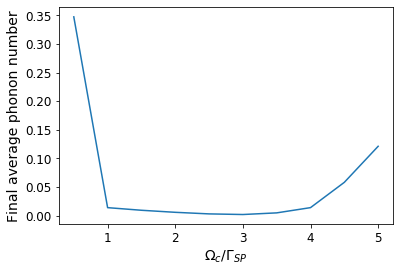

In [41]:
min_avg_num = []
for cooling_data in cooling_limits:
    min_avg_num.append(np.min(np.abs(cooling_data)))
plt.plot(ratios, min_avg_num)
plt.xlabel('$\Omega_c/\Gamma_{SP}$')
plt.ylabel('Final average phonon number')

Temperature limit1： 0.001058
Temperature limit2： 0.002014
Delta =  192.79999999999984
Mode frequency =  2.3999999999999995


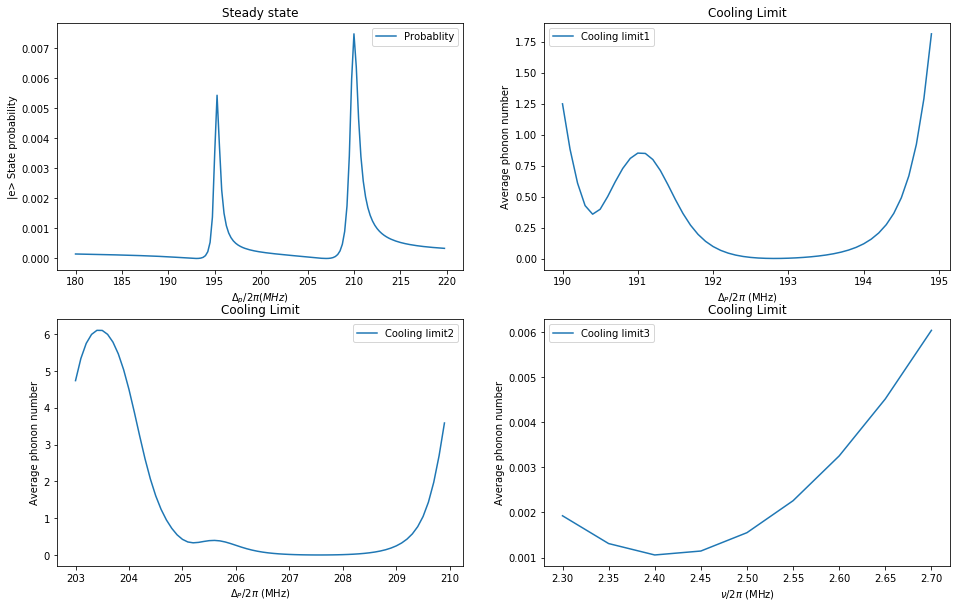

In [17]:
MaxPhonon = 10

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23
Omega_Plus2 = 0.85
Omega_Minus2 = 0.85

Delta = 200 # pumping beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta-Zeeman
Delta_Plus = Delta+Zeeman
Delta_P = -Delta
Delta0 = 0
nu = 2.4 # mode frequency
eta = 0.1

DeltaList = np.arange(180,220,0.25)

StatePopulation_e = []
# StatePopulation_p = []
# StatePopulation_0 = []
# StatePopulation_m = []
for Delta in DeltaList:
    delta_dp = Delta_Minus - Delta

    rho_ss = DoubleEITNoMotion_cryo_steadystate(Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, 
                                Delta0, Delta_Minus, Delta, Delta_Plus, delta_dp, gammaSP)
    StatePopulation_e.append(rho_ss.full()[0,0])
    
cooling_detuning_list1 = np.arange(190,195,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                        ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(203,210,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                        ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for Delta in cooling_detuning_list2]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(2.3,2.7,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion_cryo_steadystate(
                        Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, 
                        Delta, Delta_Plus, nu, eta, -eta, Delta_Minus - Delta, gammaSP
                                                      ).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  
                     for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, StatePopulation_e, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('|e> State probability')
ax.set_title('Steady state')

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

print('Delta = ',Delta)
print('Mode frequency = ', BestDetuning(motion_frequency_list, np.abs(cooling_limit_List3))[0])

# Cooling Speed

In [70]:
MaxPhonon = 10
def EquilibriumTime(tlist, exp, tol = 1e-6):
    for i in range(len(exp)-1):
        diff = np.abs(exp[i+1]-exp[i])
        if diff < tol:
            break
    return tlist[i]

ratio = 0.04
Time used:0:02:34.974814
ratio = 0.05


/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Time used:0:03:36.050536
ratio = 0.06
Time used:0:06:17.312418
ratio = 0.07
Time used:0:06:15.582815
ratio = 0.08
Time used:0:05:39.687190
ratio = 0.09
Time used:0:06:17.982238
ratio = 0.1
Time used:0:05:54.329816
ratio = 0.11
Time used:0:04:41.070415
ratio = 0.12
Time used:0:04:48.318935
ratio = 0.13
Time used:0:04:50.431637
ratio = 0.14
Time used:0:04:51.660797
ratio = 0.15
Time used:0:04:11.661511
ratio = 0.16
Time used:0:04:19.970297
ratio = 0.17
Time used:0:04:34.536786
ratio = 0.18
Time used:0:04:30.639954
ratio = 0.19
Time used:0:04:23.772458


Text(0, 0.5, 'Time to reach equilbrium [us]')

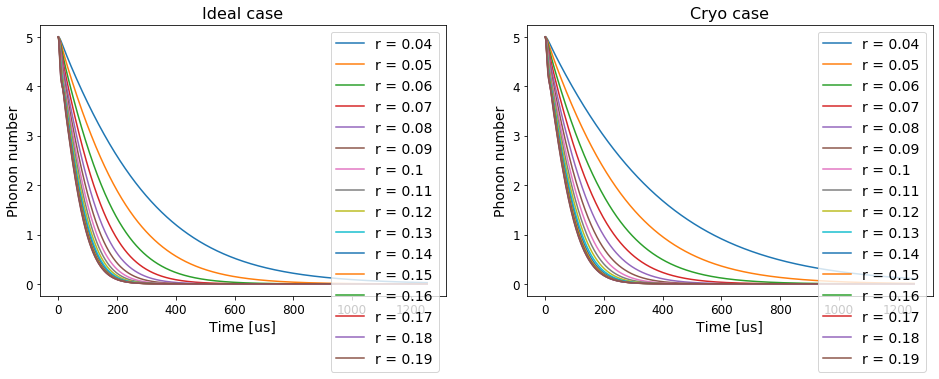

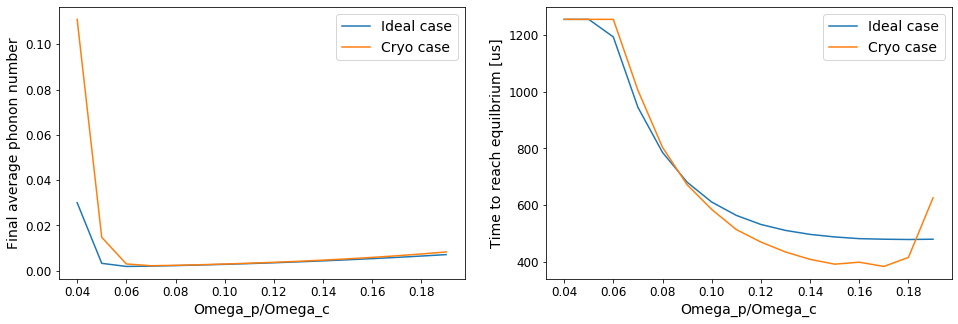

In [71]:
MaxPhonon = 10
tlist = np.arange(0,200*2*np.pi,1)
rho0 = tensor(basis(4,2),basis(MaxPhonon, 5))

gammaSP = 19.7/3 #Linewith
Omega_Plus = gammaSP*3 # Rabi frequency
Omega_Minus = gammaSP*3

ratios = np.arange(0.04, 0.2, 0.01)
fig = plt.figure(figsize=(16,5))
finalPhononNum1 = []
finalPhononNum2 = []
equilTime1 = []
equilTime2 = []

for ratio in ratios: 
    time1 = datetime.datetime.now()
    print('ratio = '+str(round(ratio, 2)))
    OmegaPi = Omega_Plus*ratio
    Omega_Plus2 = OmegaPi/2
    Omega_Minus2 = OmegaPi/2

    Delta = 125 # pumping beam detuning
    Zeeman = 7 # Zeeman shift
    delta_dp = -Zeeman
    Delta_Minus = Delta-Zeeman
    Delta_Plus = Delta+Zeeman
    Delta_P = -Delta
    Delta0 = 0
    nu = 2.0 # mode frequency
    eta = 0.1
    eta_pi = eta*0.707
    eta_sigma = -eta

    Delta = 118.5
    output1 = DoubleEITSimulationWithIonMotion_test(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP)
    output2 = DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta_pi, eta_sigma, delta_dp, gammaSP)
    
    finalPhononNum1.append(output1.expect[0][-1])
    finalPhononNum2.append(output2.expect[0][-1])
    equilTime1.append(EquilibriumTime(tlist, output1.expect[0], tol = 1e-6))
    equilTime2.append(EquilibriumTime(tlist, output2.expect[0], tol = 1e-6))
    
    ax = fig.add_subplot(1,2,1)
    label = 'r = '+str(round(ratio, 2))
    ax.plot(tlist, output1.expect[0],label = label)
    ax.legend()
    ax.set_title('Ideal case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    ax = fig.add_subplot(1,2,2)
    label = 'r = '+str(round(ratio, 2))
    ax.plot(tlist, output2.expect[0],label = label)
    ax.legend()
    ax.set_title('Cryo case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    time2 = datetime.datetime.now()
    print('Time used:'+str(time2-time1))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.plot(ratios, finalPhononNum1, label = 'Ideal case')
ax.plot(ratios, finalPhononNum2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Final average phonon number')

ax = fig.add_subplot(1,2,2)
ax.plot(ratios, equilTime1, label = 'Ideal case')
ax.plot(ratios, equilTime2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Time to reach equilbrium [us]')

ratio = 0.02
Time used:0:02:05.985338
ratio = 0.022


/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Time used:0:02:06.721359
ratio = 0.024
Time used:0:02:08.696078
ratio = 0.026
Time used:0:02:09.554043
ratio = 0.028
Time used:0:02:11.418835
ratio = 0.03
Time used:0:02:23.440187
ratio = 0.032
Time used:0:02:22.499717
ratio = 0.034
Time used:0:02:22.805571
ratio = 0.036
Time used:0:02:24.818378
ratio = 0.038
Time used:0:02:36.150344
ratio = 0.04
Time used:0:02:38.014641
ratio = 0.042
Time used:0:02:38.062456
ratio = 0.044
Time used:0:02:33.208869
ratio = 0.046
Time used:0:02:30.260728
ratio = 0.048
Time used:0:02:33.832690
ratio = 0.05
Time used:0:02:12.053528
ratio = 0.052
Time used:0:02:12.194530
ratio = 0.054
Time used:0:02:11.878305
ratio = 0.056
Time used:0:02:11.509537
ratio = 0.058
Time used:0:02:13.063753
ratio = 0.06
Time used:0:02:12.507067
ratio = 0.062
Time used:0:02:13.523501
ratio = 0.064
Time used:0:02:12.610591
ratio = 0.066
Time used:0:02:13.091150
ratio = 0.068
Time used:0:02:13.589000
ratio = 0.07
Time used:0:02:13.862427
ratio = 0.072
Time used:0:02:14.267323
ratio

Text(0, 0.5, 'Time to reach equilbrium [us]')

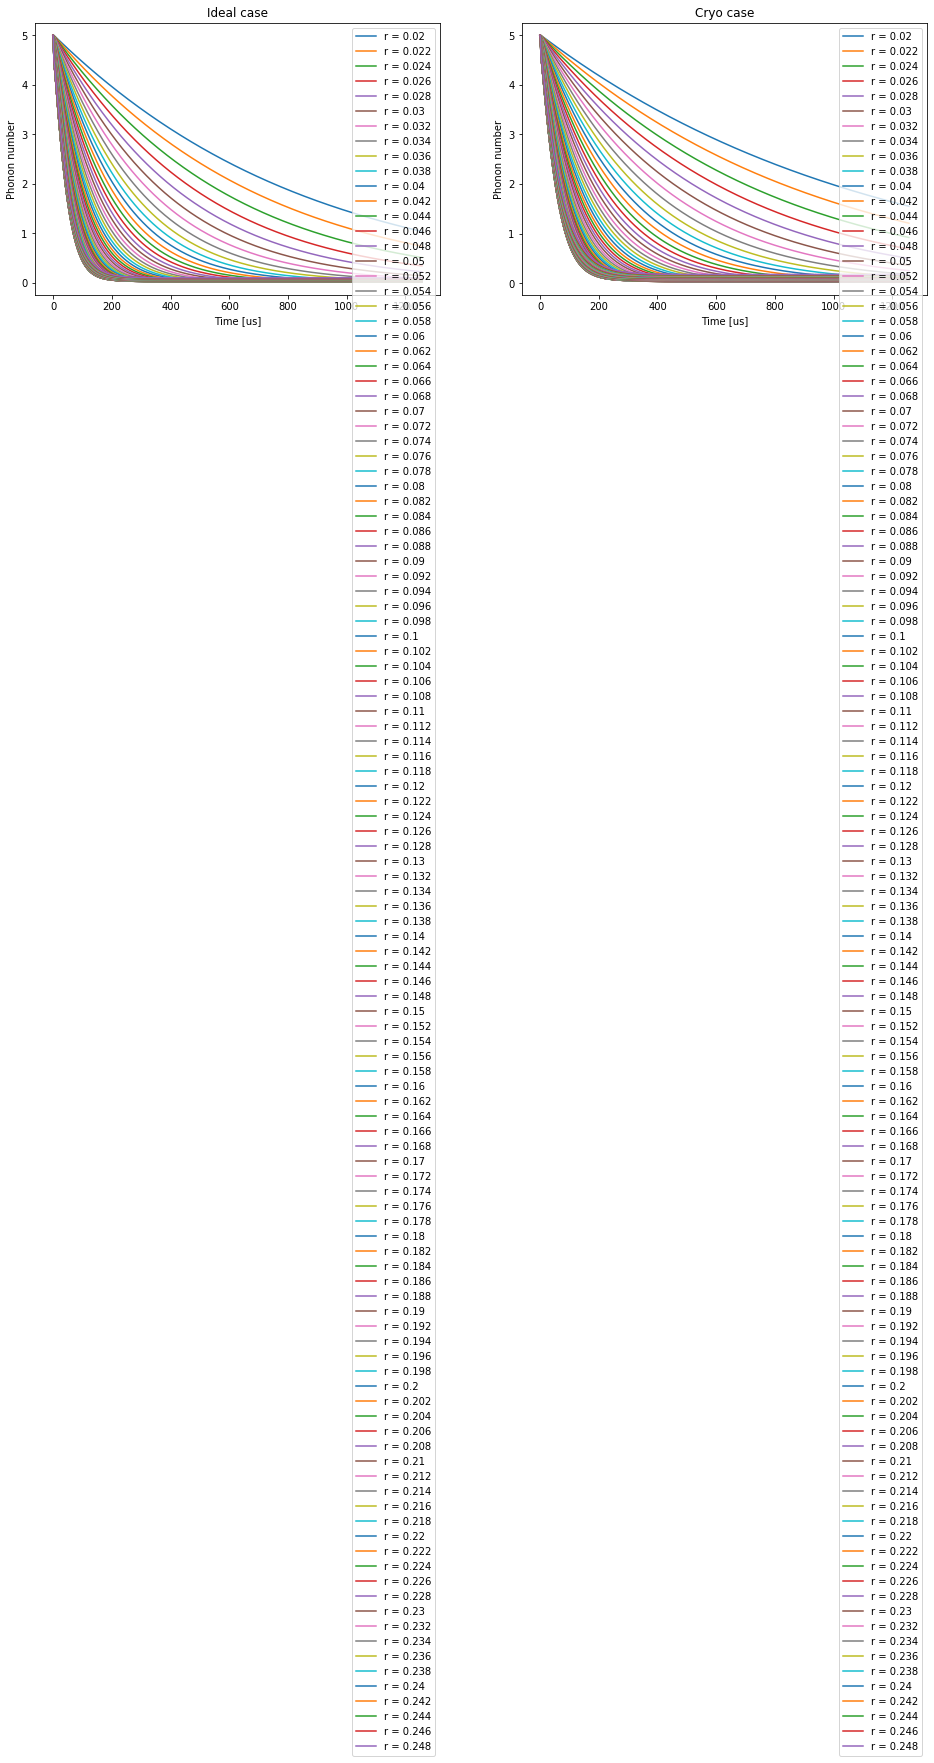

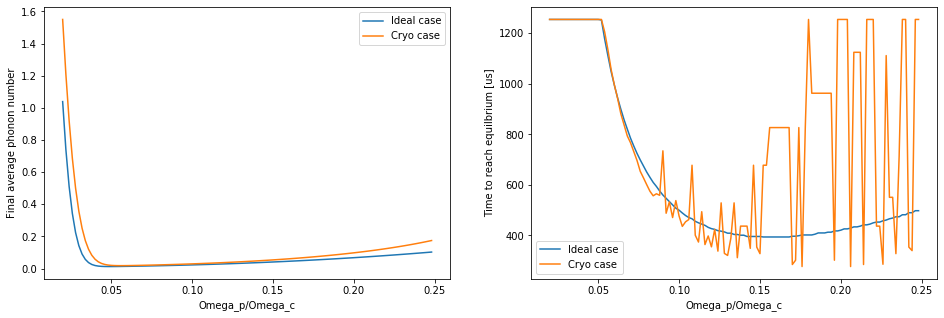

In [89]:
MaxPhonon = 10
tlist = np.arange(0,200*2*np.pi,1)
rho0 = tensor(basis(4,2),basis(MaxPhonon, 5))

gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
Omega_Minus = 23

ratios = np.arange(0.02, 0.25, 0.002)
fig = plt.figure(figsize=(16,5))
finalPhononNum1 = []
finalPhononNum2 = []
equilTime1 = []
equilTime2 = []

for ratio in ratios: 
    time1 = datetime.datetime.now()
    print('ratio = '+str(round(ratio, 3)))
    OmegaPi = Omega_Plus*ratio
    Omega_Plus2 = OmegaPi/2
    Omega_Minus2 = OmegaPi/2

    Delta = 50 # pumping beam detuning
    Zeeman = 7 # Zeeman shift
    delta_dp = -Zeeman
    Delta_Minus = Delta-Zeeman
    Delta_Plus = Delta+Zeeman
    Delta_P = -Delta
    Delta0 = 0
    nu = 2.4 # mode frequency
    eta = 0.1
    eta_pi = eta*0.707
    eta_sigma = -eta

    Delta = 45.5
    output1 = DoubleEITSimulationWithIonMotion_test(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP)
    output2 = DoubleEITSimulationWithIonMotion_cryo_mesolve(tlist, rho0, Omega_Plus, OmegaPi, Omega_Minus, Omega_Plus2, Omega_Minus2, Delta0, Delta_Minus, Delta, Delta_Plus, nu, eta_pi, eta_sigma, delta_dp, gammaSP)
    
    finalPhononNum1.append(output1.expect[0][-1])
    finalPhononNum2.append(output2.expect[0][-1])
    equilTime1.append(EquilibriumTime(tlist, output1.expect[0], tol = 1e-6))
    equilTime2.append(EquilibriumTime(tlist, output2.expect[0], tol = 1e-6))
    
    ax = fig.add_subplot(1,2,1)
    label = 'r = '+str(round(ratio, 3))
    ax.plot(tlist, output1.expect[0],label = label)
    ax.legend()
    ax.set_title('Ideal case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    ax = fig.add_subplot(1,2,2)
    label = 'r = '+str(round(ratio, 3))
    ax.plot(tlist, output2.expect[0],label = label)
    ax.legend()
    ax.set_title('Cryo case')
    ax.set_xlabel('Time [us]')
    ax.set_ylabel('Phonon number')
    
    time2 = datetime.datetime.now()
    print('Time used:'+str(time2-time1))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.plot(ratios, finalPhononNum1, label = 'Ideal case')
ax.plot(ratios, finalPhononNum2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Final average phonon number')

ax = fig.add_subplot(1,2,2)
ax.plot(ratios, equilTime1, label = 'Ideal case')
ax.plot(ratios, equilTime2, label = 'Cryo case')
ax.legend()
ax.set_xlabel('Omega_p/Omega_c')
ax.set_ylabel('Time to reach equilbrium [us]')

## Axial direction

Temperature limit1： 0.646366
Temperature limit2： 1.086953


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


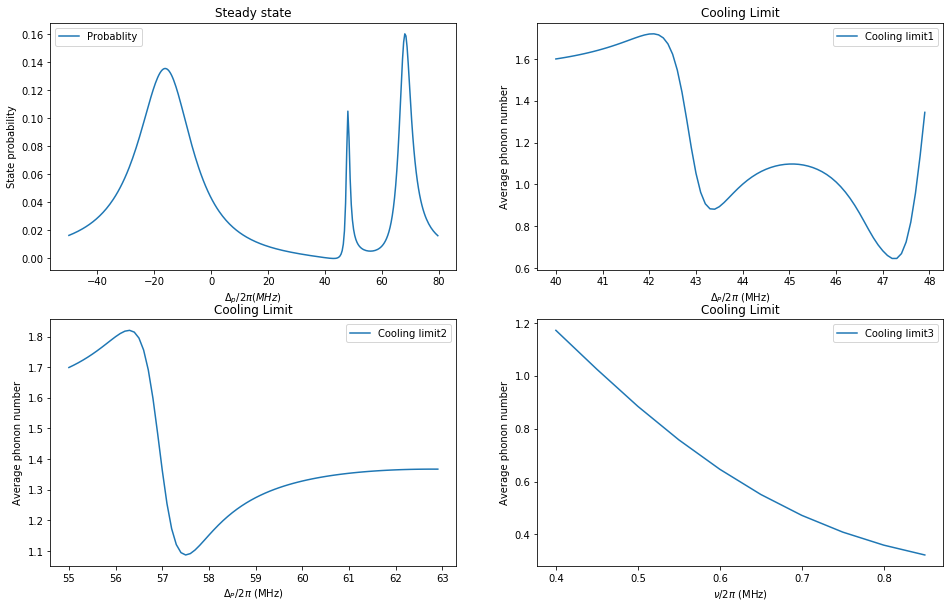

In [3]:
gammaSP = 7 #Linewith
Omega_Plus = 23 # Rabi frequency
OmegaPi = 1.7
Omega_Minus = 23
Delta = 50 # pumping beam detuning
Zeeman = 7 # Zeeman shift
Delta_Minus = Delta-Zeeman
Delta_Plus = Delta+Zeeman
Delta_P = -Delta
Delta0 = 0
nu = 0.6 # mode frequency
eta = 0.12

cooling_detuning_list1 = np.arange(40,48,0.1)
cooling_limit_List1=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  for Delta in cooling_detuning_list1]

cooling_detuning_list2 = np.arange(55,63,0.1)
cooling_limit_List2=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  for Delta in cooling_detuning_list2]

DeltaList = np.arange(-50,80,0.4)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] for Delta in DeltaList]

Delta = BestDetuning(cooling_detuning_list1, np.abs(cooling_limit_List1))[0]
motion_frequency_list = np.arange(0.4,0.9,0.05)
cooling_limit_List3=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP).ptrace(1)*create(MaxPhonon)*destroy(MaxPhonon)).tr()  for nu in motion_frequency_list]

print('Temperature limit1： %f'%np.min(np.abs(cooling_limit_List1)))
print('Temperature limit2： %f'%np.min(np.abs(cooling_limit_List2)))

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p/2\pi (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list1, cooling_limit_List1, label="Cooling limit1")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,3)
ax.plot(cooling_detuning_list2, cooling_limit_List2, label="Cooling limit2")
ax.legend()
ax.set_xlabel('$\Delta_P/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

ax = fig.add_subplot(2,2,4)
ax.plot(motion_frequency_list, cooling_limit_List3, label="Cooling limit3")
ax.legend()
ax.set_xlabel('$\\nu/2\pi$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

### Reference setting

In [44]:
gammaSP = 7
Omega_Plus = 17
OmegaPi = 0.5
Omega_Minus = 17
Delta = 55
Zeeman = 5
Delta_Minus = Delta-Zeeman
Delta_Plus = Delta+Zeeman
Delta_P = -Delta
Delta0 = 0
nu = 1.5
eta = 0.1

cooling_detuning_list = np.arange(40,65,0.1)
cooling_limit_List=[(DoubleEITSimulationWithIonMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, nu, eta, -eta, gammaSP).ptrace(1)*create(4)*destroy(4)).tr()  for Delta in cooling_detuning_list]

DeltaList = np.arange(-50,80,0.4)
ExcitedStatePopulation = [DoubleEITNoMotion(Omega_Plus, OmegaPi, Omega_Minus, Delta0,  Delta_Minus, Delta, Delta_Plus, gammaSP).full()[-1,-1] for Delta in DeltaList]


fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,2,1)
ax.plot(DeltaList, ExcitedStatePopulation, label="Probablity")
ax.legend()
ax.set_xlabel('$\Delta_p (MHz)$')
ax.set_ylabel('State probability')
ax.set_title('Steady state');

ax = fig.add_subplot(2,2,2)
ax.plot(cooling_detuning_list, cooling_limit_List, label="Cooling limit")
ax.legend()
ax.set_xlabel('$\Delta_P$ (MHz)')
ax.set_ylabel('Average phonon number')
ax.set_title('Cooling Limit');

### Analytical solution
#### One $\Lambda$ system

gamma = 7
Omega_Plus = 17
OmegaPi = 0.5
Omega_Minus = 17
nu = 3
eta = 0.1
APlus = OmegaPi**2/gamma*gamma**2*nu**2/(gamma**2*nu**2+4*(Omega_Plus**2/4-nu*(nu-Delta))**2)
AMinus = OmegaPi**2/gamma*gamma**2*nu**2/(gamma**2*nu**2+4*(Omega_Plus**2/4-nu*(nu+Delta))**2)
print('Cooling limit: %f'%(APlus/(AMinus-APlus)))

#### Scartting rate

 $$
 R_{Scatt} = \frac{\Gamma}{2} \frac{\Omega^2/2}{\delta^2+\Omega^2/2+\Gamma^2/4}
 $$

In [64]:
gammaSP = 7.
Omega_Plus = 23.
OmegaPi = 1.7
Omega_Minus = 23.
Delta = 30.
Zeeman = 7.
nu = 2.7
eta = 0.1
EITtime = 100 #us
intensityRatio = 10**-3

#Prob beam
RProb = 2*np.pi*gammaSP/2*(OmegaPi*intensityRatio)**2/2/(Delta**2+(OmegaPi*intensityRatio)**2/2+gammaSP**2/4)
print(RProb*EITtime)

#Drive beam
Delta = -2100
RDrive = 2*intensityRatio*2*np.pi*gammaSP/2* (Omega_Plus*intensityRatio)**2/2/(Delta**2+(Omega_Plus*intensityRatio)**2/2+gammaSP**2/4)
RDrive*EITtime

3.483388286185344e-06


2.6379331702639306e-10

In [62]:
Delta = 30
2*np.pi*gammaSP/2*(OmegaPi*intensityRatio)**2/2/(Delta**2+(OmegaPi*intensityRatio)**2/2+gammaSP**2/4)*10**6*100*10**-6

3.483388286185344e-06

## Calculate Isat

$$
I_{sat} = \frac{\pi h c}{3 \lambda^3 \tau}
$$

In [7]:
lam1 = 369.5*10**(-9) #Wavelength of P_{1/2} transition
lam2 = 329.0*10**(-9) #Wavelength of P_{3/2} transition
Gamma1 = 2*np.pi*19.6*10**6
Gamma2 = 2*np.pi*25.9*10**6
tau1 = 1/Gamma1
tau2 = 1/Gamma2
h = 6.626*10**(-34)
c = 2.998*10**8

Isat1 = np.pi*h*c/(3*lam1**3*tau1)
Isat2 = np.pi*h*c/(3*lam2**3*tau2)
print('Isat1 = ',Isat1, 'W/m^2')
print('Isat2 = ',Isat2, 'W/m^2')

Isat1 =  507.81355534750065 W/m^2
Isat2 =  950.6127099268763 W/m^2


In [40]:
# Red chamber
r1 = 45/2*10**(-6) # unit: m
r2 = 88/2*10**(-6) # unit: m
Area = np.pi*r1*r2
P_EIT1 = 2.4*10**(-6) # unit: W
P_EIT2 = 3.1*10**(-6) # unit: W
I_EIT1 = P_EIT1/Area
I_EIT2 = P_EIT2/Area
print('I_EIT1 = ',I_EIT1, ' = ',I_EIT1/Isat1,'*Isat \nI_EIT2 = ',I_EIT2, ' = ',I_EIT2/Isat1, '*Isat')

I_EIT1 =  771.6603301425229  =  1.5195741074979179 *Isat 
I_EIT2 =  996.7279264340921  =  1.9627832221848107 *Isat


In [11]:
# Cryo
r11 = 20/2*10**(-6) # unit: m
r12 = 20/2*10**(-6) # unit: m
Area1 = np.pi*r11*r12
r21 = 15*10**(-6) # unit: m
r22 = 15*10**(-6) # unit: m
Area2 = np.pi*r21*r22
P_EIT1 = 0.3*10**(-6) # unit: W
P_EIT2 = 0.6*10**(-6) # unit: W
I_EIT1 = P_EIT1/Area1
I_EIT2 = P_EIT2/Area2
print('I_EIT1 = ',I_EIT1, ' = ',I_EIT1/Isat1,'*Isat \nI_EIT2 = ',I_EIT2, ' = ',I_EIT2/Isat1, '*Isat')

I_EIT1 =  954.9296585513722  =  1.8804729580286739 *Isat 
I_EIT2 =  848.8263631567753  =  1.67153151824771 *Isat
